**Plan for this Notebook**

**Section 1:**
* Turning my dataset from Numerical values to the actual categorical values this will allow me to better explore the data
    1. How deep does my data go?
    2. For each column how many values are present for each unique value?

**Section 2:**
* All around exploring the Data:
    1. What is the ratio of those who Graduate vs Enrolled vs Dropout?
    2. What are the variables that I have in my dataset?
    3. What type of hypothesis am I looking to test?

**Section 3:**
* Looking at Learner Profile and exploring how we can use that to predict Dropouts?
    1. If a student has some form of education special needs or is displaced, are they more likely to dropout?
    2. What ages of students are more likely to dropout? Dive deeper into this and understand why certain age groups are more likely to dropout?
    3. What variables are the most important in determining whether students will dropout?
    4. Dive deeper into different courses and understand what courses have the highest dropout vs the lowest and try and understand why that is? Can we check if students in the courses are the same, that way can we predict the type of students that may enroll in the future?
    5. Mothers and Fathers Qualification and Occupations - are those that have parents who have 'good' jobs or had a 'good' education growing up more likely to graduate?

**Section 3.1**
* Looking at Learner Profile and exploring how we can use that to predict Dropouts?
    1. Run a Logistic Regression Machine Learning Model to help me to predict whether students will dropout, graduate or be enrolled? Once this is done figure out which variables are the most effective and dive a bit deeper to understand this?
    2. Run the Machine Learning Models again and try and apply some form of hyper tuning to produce better results, this also may include removing those variables that arent helpful in predicting the target variable.

**Section 3.2** 
* Looking at Learner Profile and exploring how we can use that to predict Dropouts?
    1. Run a XGboost Machine Learning Model to do similar to the above?
    2. Run the Machine Learning Models again and try and apply some form of hyper tuning to produce better results, this also may include removing those variables that arent helpful in predicting the target variable.

**Section 3.3** 
* Looking at Learner Profile and exploring how we can use that to predict Dropouts?
    1. I have the course break down run a RandomForrestClassifier to my dataset and look at predicting for each course. Then figure our for each course what is the most important feature and one that has the highest correlation coefficient, workout if there is some form of pattern or if its quite different?
    2. Run the Machine Learning Models again and try and apply some form of hyper tuning to produce better results, this also may include removing those variables that arent helpful in predicting the target variable.

**Section 4.1**
* Looking at Student previous grades and exploring how we can use that to predict Dropouts?
    1. Looking at the student previous qualification and semester 1 final grades and predicting semester 2 grades and finally predicting final grade?
    2. Using Machine Learning Models to help me to predict how the student will perform in the second semester and if they are likely to struggle?

**Section 4.2** 
* Looking at Student previous grades and exploring how we can use that to predict Dropouts?
    1. Look at incorporate previous qualification, semester 1 and semester 2 grades and seeing if that helps us to predict final grade achieved.
    2. Try and fine tune the model and see if that helps improve the performance of the model.

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from IPython import display
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

### Section 1

Adding the dataset and applying Mapping to each column to be able to get a better understanding of the Dataset I am dealing with.

In [434]:
df1 = pd.read_csv("data.csv", delimiter=';')
df = pd.read_csv("data.csv", delimiter=';')

In [435]:
df1.shape

(4424, 37)

In [436]:
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [437]:
mapping = {1:'single', 2:'married', 3:'widower', 4:'divorced', 5:'facto union', 6:'legally separated'}
df1["Marital status"] = df1["Marital status"].map(mapping)

In [438]:
# Ordered list of application modes based on logical progression
ordered_application_modes = [
    (1, "1st phase - general contingent"),
    (17, "2nd phase - general contingent"),
    (18, "3rd phase - general contingent"),
    (5, "1st phase - special contingent (Azores Island)"),
    (16, "1st phase - special contingent (Madeira Island)"),
    (2, "Ordinance No. 612/93"),
    (10, "Ordinance No. 854-B/99"),
    (26, "Ordinance No. 533-A/99, item b2) (Different Plan)"),
    (27, "Ordinance No. 533-A/99, item b3 (Other Institution)"),
    (15, "International student (bachelor)"),
    (39, "Over 23 years old"),
    (42, "Transfer"),
    (43, "Change of course"),
    (44, "Technological specialization diploma holders"),
    (51, "Change of institution/course"),
    (53, "Short cycle diploma holders"),
    (57, "Change of institution/course (International)"),
    (7, "Holders of other higher courses")
]

new_mapping_application_modes = {original_key: new_key + 1 for new_key, (original_key, _) in enumerate(ordered_application_modes)}

df1["Application mode"] = df1["Application mode"].map(new_mapping_application_modes)

for original_key, new_key in new_mapping_application_modes.items():
    application_mode_description = dict(ordered_application_modes)[original_key]
    print(f"New Number: {new_key}, Original Key: {original_key}, Application Mode: {application_mode_description}")


New Number: 1, Original Key: 1, Application Mode: 1st phase - general contingent
New Number: 2, Original Key: 17, Application Mode: 2nd phase - general contingent
New Number: 3, Original Key: 18, Application Mode: 3rd phase - general contingent
New Number: 4, Original Key: 5, Application Mode: 1st phase - special contingent (Azores Island)
New Number: 5, Original Key: 16, Application Mode: 1st phase - special contingent (Madeira Island)
New Number: 6, Original Key: 2, Application Mode: Ordinance No. 612/93
New Number: 7, Original Key: 10, Application Mode: Ordinance No. 854-B/99
New Number: 8, Original Key: 26, Application Mode: Ordinance No. 533-A/99, item b2) (Different Plan)
New Number: 9, Original Key: 27, Application Mode: Ordinance No. 533-A/99, item b3 (Other Institution)
New Number: 10, Original Key: 15, Application Mode: International student (bachelor)
New Number: 11, Original Key: 39, Application Mode: Over 23 years old
New Number: 12, Original Key: 42, Application Mode: Tra

In [439]:
mapping3 = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}
df1["Course"] = df1["Course"].map(mapping3)

In [440]:
mapping4 = {
    1: 'daytime',
    0: 'evening'
}
df1["Daytime/evening attendance\t"] = df1["Daytime/evening attendance\t"].map(mapping4)

In [441]:
ordered_qualifications = [
    (15, "10th year of schooling - not completed"),
    (10, "11th year of schooling - not completed"),
    (9, "12th year of schooling - not completed"),
    (19, "Basic education 3rd cycle (9th/10th/11th year) or equivalent"),
    (38, "Basic education 2nd cycle (6th/7th/8th year) or equivalent"),
    (12, "Other - 11th year of schooling"),
    (14, "10th year of schooling"),
    (1, "Secondary education"),
    (2, "Higher education - bachelor's degree"),
    (3, "Higher education - degree"),
    (40, "Higher education - degree (1st cycle)"),
    (4, "Higher education - master's"),
    (43, "Higher education - master (2nd cycle)"),
    (5, "Higher education - doctorate"),
    (39, "Technological specialization course"),
    (42, "Professional higher technical course"),
    (6, "Frequency of higher education")
]

new_mapping_qualifications = {original_key: new_key + 1 for new_key, (original_key, _) in enumerate(ordered_qualifications)}

df1["Previous qualification"] = df1["Previous qualification"].map(new_mapping_qualifications)

for original_key, new_key in new_mapping_qualifications.items():
    qualification_description = dict(ordered_qualifications)[original_key]
    print(f"New Number: {new_key}, Original Key: {original_key}, Qualification: {qualification_description}")


New Number: 1, Original Key: 15, Qualification: 10th year of schooling - not completed
New Number: 2, Original Key: 10, Qualification: 11th year of schooling - not completed
New Number: 3, Original Key: 9, Qualification: 12th year of schooling - not completed
New Number: 4, Original Key: 19, Qualification: Basic education 3rd cycle (9th/10th/11th year) or equivalent
New Number: 5, Original Key: 38, Qualification: Basic education 2nd cycle (6th/7th/8th year) or equivalent
New Number: 6, Original Key: 12, Qualification: Other - 11th year of schooling
New Number: 7, Original Key: 14, Qualification: 10th year of schooling
New Number: 8, Original Key: 1, Qualification: Secondary education
New Number: 9, Original Key: 2, Qualification: Higher education - bachelor's degree
New Number: 10, Original Key: 3, Qualification: Higher education - degree
New Number: 11, Original Key: 40, Qualification: Higher education - degree (1st cycle)
New Number: 12, Original Key: 4, Qualification: Higher educati

In [442]:
mapping6 = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}
df1['Nacionality'] = df1['Nacionality'].map(mapping6)

In [443]:
ordered_qualifications = [
    (34, "Unknown"),
    (35, "Can't read or write"),
    (36, "Can read without having a 4th year of schooling"),
    (37, "Basic education 1st cycle (4th/5th year) or equiv."),
    (26, "7th year of schooling"),
    (11, "7th Year (Old)"),
    (38, "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv."),
    (30, "8th year of schooling"),
    (29, "9th Year of Schooling - Not Completed"),
    (19, "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv."),
    (14, "10th Year of Schooling"),
    (10, "11th Year of Schooling - Not Completed"),
    (12, "Other - 11th Year of Schooling"),
    (27, "2nd cycle of the general high school course"),
    (18, "General commerce course"),
    (22, "Technical-professional course"),
    (9, "12th Year of Schooling - Not Completed"),
    (1, "Secondary Education - 12th Year of Schooling or Eq."),
    (6, "Frequency of Higher Education"),
    (2, "Higher Education - Bachelor's Degree"),
    (3, "Higher Education - Degree"),
    (40, "Higher education - degree (1st cycle)"),
    (42, "Professional higher technical course"),
    (41, "Specialized higher studies course"),
    (39, "Technological specialization course"),
    (4, "Higher Education - Master's"),
    (43, "Higher Education - Master (2nd cycle)"),
    (5, "Higher Education - Doctorate"),
    (44, "Higher Education - Doctorate (3rd cycle)"),
]

new_mapping = {original_key: new_key + 1 for new_key, (original_key, _) in enumerate(ordered_qualifications)}

df1["Mother's qualification"] = df1["Mother's qualification"].map(new_mapping)

for original_key, new_key in new_mapping.items():
    qualification_description = dict(ordered_qualifications)[original_key]
    print(f"New Number: {new_key}, Original Key: {original_key}, Qualification: {qualification_description}")


New Number: 1, Original Key: 34, Qualification: Unknown
New Number: 2, Original Key: 35, Qualification: Can't read or write
New Number: 3, Original Key: 36, Qualification: Can read without having a 4th year of schooling
New Number: 4, Original Key: 37, Qualification: Basic education 1st cycle (4th/5th year) or equiv.
New Number: 5, Original Key: 26, Qualification: 7th year of schooling
New Number: 6, Original Key: 11, Qualification: 7th Year (Old)
New Number: 7, Original Key: 38, Qualification: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
New Number: 8, Original Key: 30, Qualification: 8th year of schooling
New Number: 9, Original Key: 29, Qualification: 9th Year of Schooling - Not Completed
New Number: 10, Original Key: 19, Qualification: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
New Number: 11, Original Key: 14, Qualification: 10th Year of Schooling
New Number: 12, Original Key: 10, Qualification: 11th Year of Schooling - Not Completed
New Number: 13, Origina

In [444]:
table_data = []
for original_key, new_key in new_mapping.items():
    qualification_description = dict(ordered_qualifications)[original_key]
    table_data.append([new_key, original_key, qualification_description])

headers = ["New Number", "Original Key", "Qualification"]

print("\t".join(headers))

for row in table_data:
    print("\t".join(map(str, row)))

New Number	Original Key	Qualification
1	34	Unknown
2	35	Can't read or write
3	36	Can read without having a 4th year of schooling
4	37	Basic education 1st cycle (4th/5th year) or equiv.
5	26	7th year of schooling
6	11	7th Year (Old)
7	38	Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
8	30	8th year of schooling
9	29	9th Year of Schooling - Not Completed
10	19	Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
11	14	10th Year of Schooling
12	10	11th Year of Schooling - Not Completed
13	12	Other - 11th Year of Schooling
14	27	2nd cycle of the general high school course
15	18	General commerce course
16	22	Technical-professional course
17	9	12th Year of Schooling - Not Completed
18	1	Secondary Education - 12th Year of Schooling or Eq.
19	6	Frequency of Higher Education
20	2	Higher Education - Bachelor's Degree
21	3	Higher Education - Degree
22	40	Higher education - degree (1st cycle)
23	42	Professional higher technical course
24	41	Specialized higher studies course
25	39	Techno

In [445]:
ordered_qualifications_father = [
    (34, "Unknown"),
    (35, "Can't read or write"),
    (36, "Can read without having a 4th year of schooling"),
    (37, "Basic education 1st cycle (4th/5th year) or equiv."),
    (26, "7th year of schooling"),
    (11, "7th Year (Old)"),
    (38, "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv."),
    (30, "8th year of schooling"),
    (29, "9th Year of Schooling - Not Completed"),
    (19, "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv."),
    (14, "10th Year of Schooling"),
    (10, "11th Year of Schooling - Not Completed"),
    (12, "Other - 11th Year of Schooling"),
    (27, "2nd cycle of the general high school course"),
    (18, "General commerce course"),
    (22, "Technical-professional course"),
    (9, "12th Year of Schooling - Not Completed"),
    (1, "Secondary Education - 12th Year of Schooling or Eq."),
    (20, "Complementary High School Course"),
    (25, "Complementary High School Course - not concluded"),
    (13, "2nd year complementary high school course"),
    (31, "General Course of Administration and Commerce"),
    (33, "Supplementary Accounting and Administration"),
    (6, "Frequency of Higher Education"),
    (2, "Higher Education - Bachelor's Degree"),
    (3, "Higher Education - Degree"),
    (40, "Higher education - degree (1st cycle)"),
    (42, "Professional higher technical course"),
    (41, "Specialized higher studies course"),
    (39, "Technological specialization course"),
    (4, "Higher Education - Master's"),
    (43, "Higher Education - Master (2nd cycle)"),
    (5, "Higher Education - Doctorate"),
    (44, "Higher Education - Doctorate (3rd cycle)"),
]

new_mapping_father = {original_key: new_key + 1 for new_key, (original_key, _) in enumerate(ordered_qualifications_father)}

df1["Father's qualification"] = df1["Father's qualification"].map(new_mapping_father)

for original_key, new_key in new_mapping_father.items():
    qualification_description = dict(ordered_qualifications_father)[original_key]
    print(f"New Number: {new_key}, Original Key: {original_key}, Qualification: {qualification_description}")

New Number: 1, Original Key: 34, Qualification: Unknown
New Number: 2, Original Key: 35, Qualification: Can't read or write
New Number: 3, Original Key: 36, Qualification: Can read without having a 4th year of schooling
New Number: 4, Original Key: 37, Qualification: Basic education 1st cycle (4th/5th year) or equiv.
New Number: 5, Original Key: 26, Qualification: 7th year of schooling
New Number: 6, Original Key: 11, Qualification: 7th Year (Old)
New Number: 7, Original Key: 38, Qualification: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
New Number: 8, Original Key: 30, Qualification: 8th year of schooling
New Number: 9, Original Key: 29, Qualification: 9th Year of Schooling - Not Completed
New Number: 10, Original Key: 19, Qualification: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
New Number: 11, Original Key: 14, Qualification: 10th Year of Schooling
New Number: 12, Original Key: 10, Qualification: 11th Year of Schooling - Not Completed
New Number: 13, Origina

In [446]:
ordered_occupations_mother = [
    (99, "(blank)"),
    (90, "Other Situation"),
    (0, "Student"),
    (9, "Unskilled Workers"),
    (193, "Unskilled workers in extractive industry, construction, manufacturing and transport"),
    (192, "Unskilled workers in agriculture, animal production, fisheries and forestry"),
    (191, "Cleaning workers"),
    (194, "Meal preparation assistants"),
    (6, "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry"),
    (7, "Skilled Workers in Industry, Construction and Craftsmen"),
    (171, "Skilled construction workers and the like, except electricians"),
    (173, "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like"),
    (175, "Workers in food processing, woodworking, clothing and other industries and crafts"),
    (8, "Installation and Machine Operators and Assembly Workers"),
    (10, "Armed Forces Professions"),
    (5, "Personal Services, Security and Safety Workers and Sellers"),
    (152, "Sellers"),
    (151, "Personal service workers"),
    (153, "Personal care workers and the like"),
    (4, "Administrative staff"),
    (141, "Office workers, secretaries in general and data processing operators"),
    (144, "Other administrative support staff"),
    (143, "Data, accounting, statistical, financial services and registry-related operators"),
    (2, "Specialists in Intellectual and Scientific Activities"),
    (3, "Intermediate Level Technicians and Professions"),
    (131, "Intermediate level science and engineering technicians and professions"),
    (132, "Technicians and professionals, of intermediate level of health"),
    (134, "Intermediate level technicians from legal, social, sports, cultural and similar services"),
    (125, "Specialists in information and communication technologies (ICT)"),
    (123, "Teachers"),
    (122, "Health professionals"),
    (1, "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers"),
]

new_mapping_mother = {original_key: new_key + 1 for new_key, (original_key, _) in enumerate(ordered_occupations_mother)}

df1["Mother's occupation"] = df1["Mother's occupation"].map(new_mapping_mother)

for original_key, new_key in new_mapping_mother.items():
    occupation_description = dict(ordered_occupations_mother)[original_key]
    print(f"New Number: {new_key}, Original Key: {original_key}, Occupation: {occupation_description}")

New Number: 1, Original Key: 99, Occupation: (blank)
New Number: 2, Original Key: 90, Occupation: Other Situation
New Number: 3, Original Key: 0, Occupation: Student
New Number: 4, Original Key: 9, Occupation: Unskilled Workers
New Number: 5, Original Key: 193, Occupation: Unskilled workers in extractive industry, construction, manufacturing and transport
New Number: 6, Original Key: 192, Occupation: Unskilled workers in agriculture, animal production, fisheries and forestry
New Number: 7, Original Key: 191, Occupation: Cleaning workers
New Number: 8, Original Key: 194, Occupation: Meal preparation assistants
New Number: 9, Original Key: 6, Occupation: Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
New Number: 10, Original Key: 7, Occupation: Skilled Workers in Industry, Construction and Craftsmen
New Number: 11, Original Key: 171, Occupation: Skilled construction workers and the like, except electricians
New Number: 12, Original Key: 173, Occupation: Skilled worker

In [447]:
ordered_occupations_father = [
    (99, "(blank)"),
    (90, "Other Situation"),
    (0, "Student"),
    (9, "Unskilled Workers"),
    (192, "Unskilled workers in agriculture, animal production, fisheries and forestry"),
    (193, "Unskilled workers in extractive industry, construction, manufacturing and transport"),
    (194, "Meal preparation assistants"),
    (195, "Street vendors (except food) and street service providers"),
    (6, "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry"),
    (161, "Market-oriented farmers and skilled agricultural and animal production workers"),
    (163, "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence"),
    (7, "Skilled Workers in Industry, Construction and Craftsmen"),
    (171, "Skilled construction workers and the like, except electricians"),
    (172, "Skilled workers in metallurgy, metalworking and similar"),
    (174, "Skilled workers in electricity and electronics"),
    (175, "Workers in food processing, woodworking, clothing and other industries and crafts"),
    (8, "Installation and Machine Operators and Assembly Workers"),
    (181, "Fixed plant and machine operators"),
    (182, "Assembly workers"),
    (183, "Vehicle drivers and mobile equipment operators"),
    (5, "Personal Services, Security and Safety Workers and Sellers"),
    (151, "Personal service workers"),
    (152, "Sellers"),
    (153, "Personal care workers and the like"),
    (154, "Protection and security services personnel"),
    (10, "Armed Forces Professions"),
    (101, "Armed Forces Officers"),
    (102, "Armed Forces Sergeants"),
    (103, "Other Armed Forces personnel"),
    (4, "Administrative staff"),
    (141, "Office workers, secretaries in general and data processing operators"),
    (143, "Data, accounting, statistical, financial services and registry-related operators"),
    (144, "Other administrative support staff"),
    (2, "Specialists in Intellectual and Scientific Activities"),
    (121, "Specialists in the physical sciences, mathematics, engineering and related techniques"),
    (122, "Health professionals"),
    (123, "Teachers"),
    (124, "Specialists in finance, accounting, administrative organization, public and commercial relations"),
    (3, "Intermediate Level Technicians and Professions"),
    (131, "Intermediate level science and engineering technicians and professions"),
    (132, "Technicians and professionals, of intermediate level of health"),
    (134, "Intermediate level technicians from legal, social, sports, cultural and similar services"),
    (135, "Information and communication technology technicians"),
    (1, "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers"),
    (112, "Directors of administrative and commercial services"),
    (114, "Hotel, catering, trade and other services directors"),
]

new_mapping_father = {original_key: new_key + 1 for new_key, (original_key, _) in enumerate(ordered_occupations_father)}

df1["Father's occupation"] = df1["Father's occupation"].map(new_mapping_father)

for original_key, new_key in new_mapping_father.items():
    occupation_description = dict(ordered_occupations_father)[original_key]
    print(f"New Number: {new_key}, Original Key: {original_key}, Occupation: {occupation_description}")


New Number: 1, Original Key: 99, Occupation: (blank)
New Number: 2, Original Key: 90, Occupation: Other Situation
New Number: 3, Original Key: 0, Occupation: Student
New Number: 4, Original Key: 9, Occupation: Unskilled Workers
New Number: 5, Original Key: 192, Occupation: Unskilled workers in agriculture, animal production, fisheries and forestry
New Number: 6, Original Key: 193, Occupation: Unskilled workers in extractive industry, construction, manufacturing and transport
New Number: 7, Original Key: 194, Occupation: Meal preparation assistants
New Number: 8, Original Key: 195, Occupation: Street vendors (except food) and street service providers
New Number: 9, Original Key: 6, Occupation: Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
New Number: 10, Original Key: 161, Occupation: Market-oriented farmers and skilled agricultural and animal production workers
New Number: 11, Original Key: 163, Occupation: Farmers, livestock keepers, fishermen, hunters and gathere

In [448]:
mapping11 = {
    1: 'yes',
    0: 'no'
}

columns_to_map = ["Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "International"]
df1[columns_to_map] = df1[columns_to_map].applymap(mapping11.get)

C:\Users\hnkha\AppData\Local\Temp\ipykernel_24980\3807576699.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1[columns_to_map] = df1[columns_to_map].applymap(mapping11.get)


In [449]:
mapping12 = {
    1: 'male',
    0: 'female'
}
df1["Gender"] = df1["Gender"].map(mapping12)

In [450]:
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2,5,Animation and Multimedia Design,daytime,8,122.0,Portuguese,10,13,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,10,1,Tourism,daytime,8,160.0,Portuguese,18,26,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,Communication Design,daytime,8,122.0,Portuguese,4,4,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2,2,Journalism and Communication,daytime,8,122.0,Portuguese,7,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,11,1,Social Service (evening attendance),evening,8,100.0,Portuguese,4,7,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and Communication,daytime,8,125.0,Portuguese,18,18,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1,2,Journalism and Communication,daytime,8,120.0,Russian,18,18,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1,1,Nursing,daytime,8,154.0,Portuguese,4,4,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1,1,Management,daytime,8,180.0,Portuguese,4,4,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Section 2

**Data Exploration**

One of my hypothesis that I was looking to test was around Nationality and how people from different backgrounds may have different educational upbringings which could lead to students struggling more at university. However, from the below check we can see that most of the dataset is Portuguese, which makes it difficult to test for this hypothesis.

In [451]:
df1["Nacionality"].value_counts()

Nacionality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

From my research + experience I know that a significant amount of people graduate, definitely alot more than dropout. After running my tests I found out this to be true. There are a considerable amount of people who graduate over dropout. This means that going forward when I start building my machine learning models I will need to incorporate some form of balance technique to account for this. If I dont the algorithm were skew towards predicting graduates and this is unfair.

Based on my research I will be using the SMOTE technique.

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


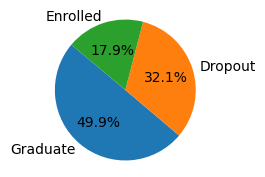

In [452]:
target_count = df1["Target"].value_counts()
print(target_count)
plt.figure(figsize=(2, 2))
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

My inital hypothesis stated that Martial Status would play a huge part in determining whether the student dropped out. Based on my code below we can see that the only circumstance where Graduate > Dropout is when the student is single. 

Now it will be good to test to see if running the Machine Learning model determines this as a key variable in determining dropout.

In [264]:
counts = df1.groupby(['Marital status', 'Target']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(0)

result = counts.copy()
for column in percentages.columns:
    result[column + '_percent'] = percentages[column]

result

Target,Dropout,Enrolled,Graduate,Dropout_percent,Enrolled_percent,Graduate_percent
Marital status,,,,,,
divorced,42,16,33,46.0,18.0,36.0
facto union,11,3,11,44.0,12.0,44.0
legally separated,4,1,1,67.0,17.0,17.0
married,179,52,148,47.0,14.0,39.0
single,1184,720,2015,30.0,18.0,51.0
widower,1,2,1,25.0,50.0,25.0


In [265]:
df1.groupby(['Course', 'Target']).size().unstack(fill_value=0).sort_values(by='Dropout', ascending=False)

Target,Dropout,Enrolled,Graduate
Course,,,
Management (evening attendance),136,54,78
Management,134,108,138
Nursing,118,100,548
Journalism and Communication,101,34,196
Tourism,96,41,115
Advertising and Marketing Management,95,48,125
Informatics Engineering,92,64,14
Veterinary Nursing,90,75,172
Agronomy,86,37,87


**Dropout Rates:**
The course with the highest dropout rate is "Management (evening attendance)" with 136 dropouts. 
"Management (evening attendance)" also shows a high ratio of dropouts to enrolled students (136 dropouts out of 54 enrolled), indicating significant retention issues.

**High Graduate Numbers:**
In addition to "Nursing", courses such as "Social Service" (248 graduates), "Journalism and Communication" (196 graduates), and "Communication Design" (133 graduates) have high graduation numbers, suggesting these programmes may have effective support systems or student retention strategies.

**Small Course Sizes:**
Courses like "Biofuel Production Technologies" have very small enrolments (3) and low graduation rates (1), indicating these may be specialised or emerging fields with low intake but potentially high retention.

**Courses with Low Dropouts:**
"Biofuel Production Technologies" and "Oral Hygiene" have very low dropout numbers (8 and 33 respectively), suggesting high retention rates in these specialised fields.

**Potential Issues in Evening Attendance Courses:**
Both "Management (evening attendance)" and "Social Service (evening attendance)" show higher dropout numbers relative to their enrolled students, suggesting that evening courses may face unique challenges, such as balancing work and study commitments.

### Section 3

I want to create my first subset that has data about learner profile

In [266]:
df1.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [267]:
cols = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t','Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation",
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']

learner_profile = df1[cols]
learner_profile

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,single,2,5,Animation and Multimedia Design,daytime,Portuguese,10,13,16,4,...,no,no,yes,male,no,20,10.8,1.4,1.74,Dropout
1,single,10,1,Tourism,daytime,Portuguese,18,26,25,39,...,no,no,no,male,no,19,13.9,-0.3,0.79,Graduate
2,single,1,5,Communication Design,daytime,Portuguese,4,4,4,4,...,no,no,no,male,no,19,10.8,1.4,1.74,Dropout
3,single,2,2,Journalism and Communication,daytime,Portuguese,7,4,16,39,...,no,no,yes,female,no,20,9.4,-0.8,-3.12,Graduate
4,married,11,1,Social Service (evening attendance),evening,Portuguese,4,7,4,4,...,no,no,yes,female,no,45,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and Communication,daytime,Portuguese,18,18,16,30,...,no,no,yes,male,no,19,15.5,2.8,-4.06,Graduate
4420,single,1,2,Journalism and Communication,daytime,Russian,18,18,4,4,...,no,yes,no,female,no,18,11.1,0.6,2.02,Dropout
4421,single,1,1,Nursing,daytime,Portuguese,4,4,4,4,...,no,no,yes,female,yes,30,13.9,-0.3,0.79,Dropout
4422,single,1,1,Management,daytime,Portuguese,4,4,10,30,...,no,no,yes,female,yes,20,9.4,-0.8,-3.12,Graduate


In [268]:
learner_profile["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [269]:
# now since i converted the df to string i need to use the orignal df to be able to run my models and code
cols = cols = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t','Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation",
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']

df_learner_profile = df[cols]

In [270]:
df_learner_profile

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,19,12,5,9,...,0,0,1,1,0,20,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,1,3,3,3,...,0,0,0,1,0,19,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,37,37,9,9,...,0,0,0,1,0,19,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,38,37,5,3,...,0,0,1,0,0,20,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,37,38,9,9,...,0,0,1,0,0,45,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,1,5,4,...,0,0,1,1,0,19,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,105,1,1,9,9,...,0,1,0,0,0,18,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,37,37,9,9,...,0,0,1,0,1,30,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,37,37,7,4,...,0,0,1,0,1,20,9.4,-0.8,-3.12,Graduate


In [271]:
# I also need to change my target variable to numerical
target_mapping = {
    "Dropout": 0,
    "Graduate": 1,
    "Enrolled": 2
}

df_learner_profile["Target"] = df_learner_profile["Target"].map(target_mapping)

C:\Users\hnkha\AppData\Local\Temp\ipykernel_24980\2673699729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_learner_profile["Target"] = df_learner_profile["Target"].map(target_mapping)


In [272]:
# first thing I want to do is check to see the correlations and if I can remove certain variables before any modeling 
df_learner_profile.corr()["Target"]

Marital status                 -0.074310
Application mode               -0.116928
Application order               0.027393
Course                          0.024210
Daytime/evening attendance\t    0.066439
Nacionality                     0.002098
Mother's qualification         -0.075941
Father's qualification         -0.035183
Mother's occupation             0.051664
Father's occupation             0.051455
Displaced                       0.070649
Educational special needs       0.003751
Debtor                         -0.154802
Tuition fees up to date         0.342121
Gender                         -0.118454
Scholarship holder              0.114517
Age at enrollment              -0.201806
Unemployment rate              -0.037279
Inflation rate                 -0.021798
GDP                             0.037052
Target                          1.000000
Name: Target, dtype: float64

### Section 4 

**First Machine Learning Model will be Logistic Regression**

**Questions I am looking at test**

Learning Profile
1. Within this dataset I have the age of the student who enrolled. Now majority of these students are around the 18-20 mark, which is when most students attend university. However, within this dataset I also have many mature students. Now, in theory my hypothesis is that the older more mature students are more likely to drop out of university because they may not have been in education for a while, they may have other commitments, i.e, managing a job + family life. However, on the flip side of that it could be said that they are the ones who won't drop out at all because they are more mature. Definitely will be worth a test.



Research question for the above could be centered around 'Are mature students more likely to dropout than non-mature students?

In [273]:
df_learner_profile.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,19,12,5,9,...,0,0,1,1,0,20,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,1,3,3,3,...,0,0,0,1,0,19,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,37,37,9,9,...,0,0,0,1,0,19,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,38,37,5,3,...,0,0,1,0,0,20,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,37,38,9,9,...,0,0,1,0,0,45,13.9,-0.3,0.79,1


Before I begin doing any form of machine learning model building I know from my research and prior information that more students graduate than dropout and therefore there will be an unbalance dataset, heavily unbalanced towards the side of Graduates. Now, looking at the value counts in my target column, this has been confirmed. Now if I run the algorithm as is I will get a skewed dataset and the results will not be accurate. For this reason I am going to create synthetic data using the SMOTE technique.

I quickly did a test with and without SMOTE and it is clear to see that the prediction heavily favours Graduate when SMOTE is not applied and when SMOTE is applied, the value drops

In [274]:
df_learner_profile["Target"].value_counts()

Target
1    2209
0    1421
2     794
Name: count, dtype: int64

In [275]:
X = df_learner_profile.drop('Target', axis=1)
y = df_learner_profile['Target']

print("Original class distribution:")
print(Counter(y))

Original class distribution:
Counter({1: 2209, 0: 1421, 2: 794})


In [276]:
smote = SMOTE(sampling_strategy={0: 2209, 2:2209})

X_res, y_res = smote.fit_resample(X, y)

print("Resampled class distribution:")
print(Counter(y_res))

Resampled class distribution:
Counter({0: 2209, 1: 2209, 2: 2209})


In [277]:
df_learner_profile_2 = pd.concat([X_res, y_res], axis=1)
print(df_learner_profile.shape)
print(df_learner_profile_2.shape)

(4424, 21)
(6627, 21)


In [278]:
df_learner_profile_2["Target"].value_counts()

Target
0    2209
1    2209
2    2209
Name: count, dtype: int64

In [279]:
df_learner_profile_2 = df_learner_profile_2[df_learner_profile_2["Target"] != 2]
df_learner_profile_2.Target.unique()

array([0, 1], dtype=int64)

**Some Pre-processing steps before modeling and evaluations**
* First I have to seperate the the dataset from the variables in question and the target variable. 
* Secondly, I split the data into training and testing sets with an 80/20 split
* Finally, I converted to tensors since my models the models in PyTorch require inputs to be in tensors

In [280]:
X = df_learner_profile_2.drop('Target', axis=1)
y = df_learner_profile_2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train_before_normalisation = torch.from_numpy(X_train.values).float()
x_test_before_normalisation = torch.from_numpy(X_test.values).float()

y_train = torch.from_numpy(y_train.values).int()
y_train = y_train.reshape(-1, 1)

y_test = torch.from_numpy(y_test.values).int()
y_test = y_test.reshape(-1, 1)

I have used the function that calculates the z score of each element. The reason for using this formula is because as I have seen when exploring the data the variables are all on different scales, therefore I need to standardise the scales.

The formula use is (x-mu)/sigma

In order for me to perform normalisation I needed to calculate the mean and standard deviation before normalisation and then use that mean and standard deviation to calculate my normalised x_train and x_test, which can be seen below

In [281]:
def norm_set(x: torch.Tensor, mu: torch.Tensor, sigma: torch.Tensor) -> torch.tensor:
  z = (x-mu)/sigma
  return z

mean = x_train_before_normalisation.mean(dim=0)
standard_deviation = x_train_before_normalisation.std(dim=0)

x_train = norm_set(x_train_before_normalisation, mean, standard_deviation)

x_test = norm_set(x_test_before_normalisation, mean, standard_deviation)

My dataset has 20 attributes that I am looking to use to help predict my target variable. Initially I will be using all 20 variables to understand how each are important in determining the target variable.

Since I am more concerned with those students who "Dropout" I will focus most of my analysis on this class.  As such, we modify the `y_train` and `y_test` tensors, so that each label is 1 if the class is  and 0 if otherwise.

In [282]:
train_set_1 = x_train[:, :20]
test_set_1 = x_test[:, :20]

dropout_train = (y_train == 0).int()
dropout_test = (y_test == 0).int()

**Below I am defining a few important models and function**

* First I am defining a custom logistic regression model
* Secondly, I create a function for my sigmoid function - this will be crucial for creating a probability to be able to understand the raw output of the logistic regression, which will allow me to better understand the outcome

In [283]:
class LogisticRegression(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.weight = nn.Parameter(torch.zeros(1, num_features), requires_grad=False)

  def forward(self, x):
    z = torch.matmul(x, self.weight.T)
    y = sigmoid(z)
    return y

In [284]:
def sigmoid(z: torch.Tensor) -> torch.Tensor:
  z = 1 / (1 + torch.exp(-z))
  return z

**Below are some more important functions that I have defined**

* The first function I defined below is the Binary Cross-Entropy (BCE) this is an important function that will help me measure how well my model predictions match the actual labels. It will help me to quantify the difference between y_pred and y_true.
* The aim of the BCE is to minmise the loss function - a lower BCE means that the models predictions are closer to the true labels
* The second is the gradient descent which is all about updating the models weight in order to minmise the loss function.

In [285]:
def bce(y_true: torch.Tensor, y_pred: torch.Tensor, epsilon: float = 1e-10) -> torch.Tensor:
  y_pred = torch.clamp(y_pred, min=epsilon, max=1 - epsilon)
  N = y_true.shape[0]
  cost_function = (1 / N) * torch.sum(-y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred))
  return cost_function

In [286]:
def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, lr: float) -> None:
  weight = model.weight
  N = X.shape[0]
  y_pred = model(X)
  performance = y_pred - y
  gradient = (1/N) * torch.matmul(X.t(), performance)
  weight = weight - (lr * gradient.T)
  model.weight = nn.Parameter(weight, requires_grad=False)
  return model.weight

**What is the below function doing**

* Initialize Cost List: Starts with an empty list to keep track of the cost during training.
* Training Loop: Runs for 1000 iterations, updating the model weights and recording the cost each time.
* Update Weights: Uses the gradient_descent_step function to adjust the model's weights based on the gradient of the loss.
* Plot Cost: After training, it plots the cost over iterations to show how well the model has learned.

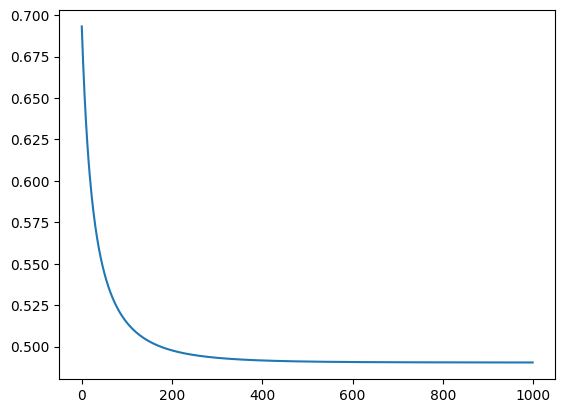

Parameter containing:
tensor([[-0.1222,  0.2061, -0.0141, -0.0409,  0.1150, -0.0084,  0.0551, -0.0489,
         -0.0818,  0.0260, -0.1348,  0.0250,  0.1239, -1.1543,  0.2092, -0.7786,
          0.2553, -0.0529,  0.0301, -0.0752]])
Minimum cost: 0.4903934895992279
[tensor(0.6931), tensor(0.6855), tensor(0.6782), tensor(0.6713), tensor(0.6649), tensor(0.6587), tensor(0.6529), tensor(0.6474), tensor(0.6422), tensor(0.6372), tensor(0.6325), tensor(0.6281), tensor(0.6238), tensor(0.6198), tensor(0.6159), tensor(0.6123), tensor(0.6087), tensor(0.6054), tensor(0.6022), tensor(0.5991), tensor(0.5962), tensor(0.5934), tensor(0.5907), tensor(0.5881), tensor(0.5856), tensor(0.5832), tensor(0.5810), tensor(0.5787), tensor(0.5766), tensor(0.5746), tensor(0.5726), tensor(0.5707), tensor(0.5689), tensor(0.5671), tensor(0.5654), tensor(0.5638), tensor(0.5622), tensor(0.5606), tensor(0.5591), tensor(0.5577), tensor(0.5563), tensor(0.5549), tensor(0.5536), tensor(0.5523), tensor(0.5511), tensor(0.5499),

In [287]:
def train(model, x, y, alpha):
  cost_lst = list()
  for it in range(1000):
    prediction = model(x)
    cost = bce(y, prediction)
    cost_lst.append(cost)
    gradient_descent_step(model, x, y, alpha)
  display.clear_output(wait=True)
  plt.plot(list(range(it+1)), cost_lst)
  plt.show()
  print(model.weight)
  print('Minimum cost: {}'.format(min(cost_lst)))
  print(cost_lst)

model = LogisticRegression(train_set_1.shape[1])
alpha = 0.05
train(model, train_set_1, dropout_train, alpha)

**Prediction Function:**

* Uses the trained model to predict probabilities for the input data.
* Converts these probabilities into binary class predictions.

**Evaluation Preparation:**

* y_test_pred holds the model’s predictions on the test set.
* y_test_actual holds the true labels.

In [288]:
def predict(model, x):
    with torch.no_grad():
        y_pred_prob = model(x)
        y_pred = (y_pred_prob > 0.5).int()
    return y_pred

y_test_pred = predict(model, test_set_1)
y_test_actual = dropout_test

y_test_pred_np = y_test_pred.numpy().flatten()
y_test_actual_np = y_test_actual.numpy().flatten()

Now that I have the model predicted results I am going to produce a confusion matrix and classification report to better understand the results

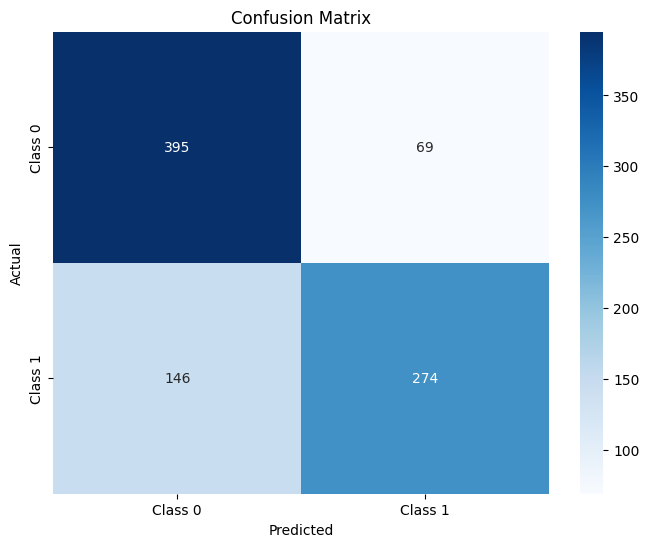

In [289]:
conf_matrix = confusion_matrix(y_test_actual_np, y_test_pred_np)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

745 instances were correctly predicted as negative (0). These are actual negative cases that were correctly identified by the model.

137 instances were incorrectly predicted as positive (1), while they were actually negative (0). These are false alarms where the model mistakenly identified negatives as positives.

180 instances were incorrectly predicted as negative (0), while they were actually positive (1). These are missed positive cases where the model failed to identify positives correctly.

264 instances were correctly predicted as positive (1). These are the actual positive cases that were correctly identified by the model.

In [290]:
class_report = classification_report(y_test_actual_np, y_test_pred_np)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       464
           1       0.80      0.65      0.72       420

    accuracy                           0.76       884
   macro avg       0.76      0.75      0.75       884
weighted avg       0.76      0.76      0.75       884



Feature Importance Ranking:
Age at enrollment               0.255296
Gender                          0.209178
Application mode                0.206135
Debtor                          0.123912
Daytime/evening attendance\t    0.114964
Mother's qualification          0.055127
Inflation rate                  0.030076
Father's occupation             0.025996
Educational special needs       0.025043
Nacionality                    -0.008415
Application order              -0.014134
Course                         -0.040904
Father's qualification         -0.048857
Unemployment rate              -0.052887
GDP                            -0.075234
Mother's occupation            -0.081796
Marital status                 -0.122164
Displaced                      -0.134848
Scholarship holder             -0.778581
Tuition fees up to date        -1.154268
dtype: float32


C:\Users\hnkha\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


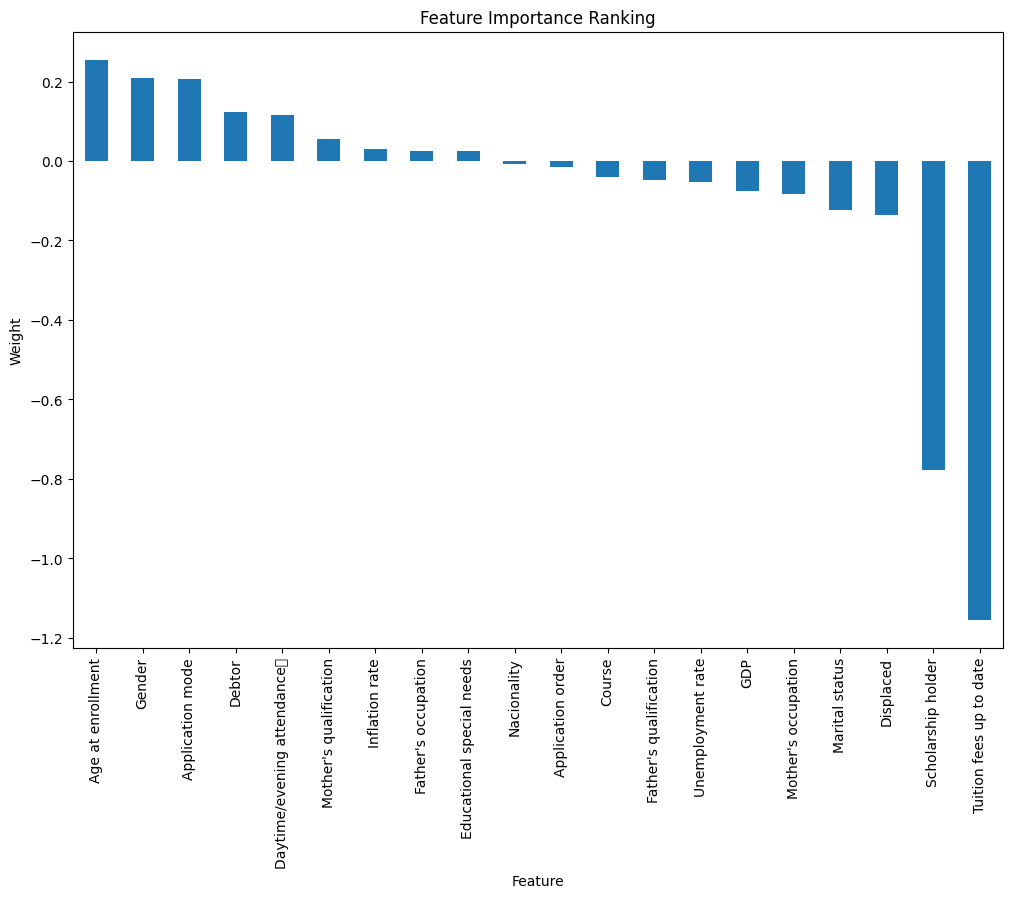

In [291]:
# Feature Importance Analysis
def get_feature_importance(model, feature_names):
    weights = model.weight.detach().numpy().flatten()
    feature_importance = pd.Series(weights, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)
    return feature_importance

feature_names = X_train.columns.tolist()

feature_importance = get_feature_importance(model, feature_names)
print('Feature Importance Ranking:')
print(feature_importance)

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Feature Importance Ranking')
plt.show()

### Section 4.2

In [292]:
class XGBoostModel(nn.Module):
    def __init__(self, xgb_model: xgb.Booster):
        super(XGBoostModel, self).__init__()
        self.xgb_model = xgb_model

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x_np = x.cpu().numpy()
        dmatrix = xgb.DMatrix(x_np)
        y_pred = self.xgb_model.predict(dmatrix)
        y_pred_tensor = torch.tensor(y_pred, dtype=torch.float32)
        return y_pred_tensor

In [293]:
X = df_learner_profile_2.drop(columns=['Target']).values
y = df_learner_profile_2['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [294]:
params = {
    'objective': 'reg:squarederror',  
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

model = XGBoostModel(xgb_model)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [295]:
y_pred_list = []
y_test_list = []

for X_batch, y_batch in test_dataloader:
    y_pred = model(X_batch)
    y_pred_list.append(y_pred.detach().cpu().numpy())
    y_test_list.append(y_batch.detach().cpu().numpy())

y_pred_all = np.concatenate(y_pred_list, axis=0)
y_test_all = np.concatenate(y_test_list, axis=0)

y_pred_decoded = (y_pred_all > 0.5).astype(int)
y_test_decoded = y_test_all.astype(int)

In [296]:
print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Confusion Matrix:
 [[329  91]
 [ 76 388]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       420
           1       0.81      0.84      0.82       464

    accuracy                           0.81       884
   macro avg       0.81      0.81      0.81       884
weighted avg       0.81      0.81      0.81       884



In [297]:
feature_names = df_learner_profile_2.drop(columns=['Target']).columns

xgb_regressor = XGBRegressor(
    objective='reg:squarederror', 
    max_depth=6,
    eta=0.1,
    subsample=0.8,
    n_estimators=100
)

xgb_regressor.fit(X_train, y_train)

booster = xgb_regressor.get_booster()

importance = booster.get_score(importance_type='weight')

importance_named = {feature_names[int(k[1:])]: v for k, v in importance.items()}

importance_df = pd.DataFrame({
    'Feature': importance_named.keys(),
    'Importance': importance_named.values()
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
3                         Course       656.0
16             Age at enrollment       475.0
1               Application mode       446.0
9            Father's occupation       338.0
7         Father's qualification       326.0
8            Mother's occupation       325.0
6         Mother's qualification       316.0
17             Unemployment rate       271.0
13       Tuition fees up to date       251.0
19                           GDP       249.0
18                Inflation rate       236.0
2              Application order       225.0
15            Scholarship holder       152.0
0                 Marital status       121.0
14                        Gender        92.0
10                     Displaced        92.0
12                        Debtor        78.0
5                    Nacionality        66.0
4   Daytime/evening attendance\t        27.0
11     Educational special needs        11.0


C:\Users\hnkha\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


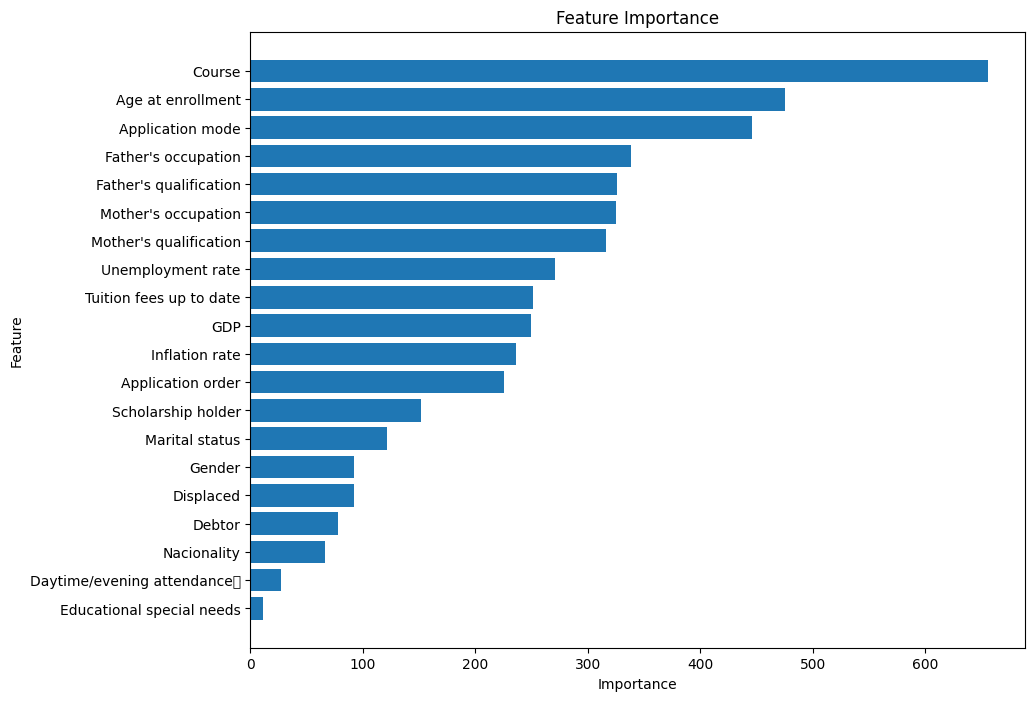

In [298]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Section 4.3

**Producing a RandomForrestClassifier**

In [299]:
# Before handling any imbalance

In [300]:
course_groups = df_learner_profile.groupby('Course')

In [301]:
original_course_models = {}
original_course_reports = {}
original_accuracies = {}

for course, data in course_groups:
    X = data.drop(['Target', 'Course'], axis=1)
    y = data['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    original_course_models[course] = model
    original_course_reports[course] = classification_report(y_test, y_pred, output_dict=True)
    original_accuracies[course] = accuracy_score(y_test, y_pred)
    
    print(f"Course: {course}")
    print("Original model report:")
    print(classification_report(y_test, y_pred))

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Course: 33
Original model report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

Course: 171
Original model report:
              precision    recall  f1-score   support

           0       0.47      0.39      0.42        18
           1       0.41      0.65      0.50        17
           2       0.00      0.00      0.00         8

    accuracy                           0.42        43
   macro avg       0.29      0.35      0.31        43
weighted avg       0.36      0.42      0.38        43

Course: 8014
Original model report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.75      0.83      0.79        29
           2       0.00 

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Course: 9130
Original model report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.54      0.78      0.64         9
           2       0.00      0.00      0.00         4

    accuracy                           0.66        29
   macro avg       0.43      0.51      0.46        29
weighted avg       0.58      0.66      0.61        29

Course: 9147
Original model report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65        25
           1       0.71      0.67      0.69        33
           2       0.33      0.33      0.33        18

    accuracy                           0.59        76
   macro avg       0.56      0.56      0.56        76
weighted avg       0.59      0.59      0.59        76

Course: 9238
Original model report:
              precision    recall  f1-score   support

           0       0.50      0.22      0.31        18
           1       0.

In [302]:
# Using randomforrestclassifier imbuilt function that balances the data using weighting

In [303]:
weighted_course_models = {}
weighted_course_reports = {}
weighted_accuracies = {}

for course, data in course_groups:
    X = data.drop(['Target', 'Course'], axis=1)
    y = data['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    weighted_course_models[course] = model
    weighted_course_reports[course] = classification_report(y_test, y_pred, output_dict=True)
    weighted_accuracies[course] = accuracy_score(y_test, y_pred)
    
    print(f"Course: {course}")
    print("Class weight adjusted model report:")
    print(classification_report(y_test, y_pred))

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Course: 33
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

Course: 171
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        18
           1       0.46      0.71      0.56        17
           2       0.00      0.00      0.00         8

    accuracy                           0.47        43
   macro avg       0.32      0.38      0.34        43
weighted avg       0.39      0.47      0.42        43

Course: 8014
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.73      0.76      

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Course: 9119
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.00      0.00      0.00         3
           2       0.55      0.60      0.57        10

    accuracy                           0.71        34
   macro avg       0.44      0.49      0.46        34
weighted avg       0.64      0.71      0.67        34

Course: 9130
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.70      0.78      0.74         9
           2       0.00      0.00      0.00         4

    accuracy                           0.72        29
   macro avg       0.48      0.55      0.51        29
weighted avg       0.62      0.72      0.67        29

Course: 9147
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.62      0.60   

In [304]:
weighted_course_models = {}
weighted_course_reports = {}
weighted_accuracies = {}
course_feature_importances = {}

for course, data in course_groups:
    X = data.drop(['Target', 'Course'], axis=1)
    y = data['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    weighted_course_models[course] = model
    weighted_course_reports[course] = classification_report(y_test, y_pred, output_dict=True)
    weighted_accuracies[course] = accuracy_score(y_test, y_pred)
    
    importances = model.feature_importances_
    feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, importances)}
    course_feature_importances[course] = feature_importance_dict
    
    print(f"Course: {course}")
    print("Class weight adjusted model report:")
    print(classification_report(y_test, y_pred))
    print("Feature Importances:")
    print(pd.Series(importances, index=X.columns).sort_values(ascending=False))

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Course: 33
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

Feature Importances:
Debtor                          0.118173
Age at enrollment               0.111381
GDP                             0.095539
Father's occupation             0.091863
Mother's qualification          0.091658
Father's qualification          0.085857
Application mode                0.081811
Unemployment rate               0.074801
Inflation rate                  0.074690
Mother's occupation             0.073195
Gender                          0.050213
Displaced                       0.019843
Tuition fees up to date         0.019347
Nacionality                     0.009963
Marital status                 

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Course: 9130
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.70      0.78      0.74         9
           2       0.00      0.00      0.00         4

    accuracy                           0.72        29
   macro avg       0.48      0.55      0.51        29
weighted avg       0.62      0.72      0.67        29

Feature Importances:
Age at enrollment               0.133435
Father's occupation             0.102341
Inflation rate                  0.091917
Mother's qualification          0.087983
GDP                             0.087512
Application mode                0.086205
Father's qualification          0.075441
Mother's occupation             0.075010
Unemployment rate               0.069391
Debtor                          0.051652
Tuition fees up to date         0.032101
Gender                          0.030892
Displaced                       0.020566
Marital status  

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Course: 9238
Class weight adjusted model report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        18
           1       0.63      0.91      0.75        44
           2       0.50      0.11      0.18         9

    accuracy                           0.62        71
   macro avg       0.54      0.40      0.39        71
weighted avg       0.58      0.62      0.55        71

Feature Importances:
Age at enrollment               0.131949
Father's occupation             0.096872
Unemployment rate               0.090936
Mother's occupation             0.079255
Inflation rate                  0.077767
Tuition fees up to date         0.068128
GDP                             0.066254
Mother's qualification          0.063170
Application mode                0.058760
Father's qualification          0.058663
Scholarship holder              0.056425
Application order               0.040844
Gender                          0.035262
Debtor          

In [305]:
final_feature_importances = pd.DataFrame(course_feature_importances).fillna(0) 
average_feature_importance = final_feature_importances.mean(axis=1).sort_values(ascending=False)

print("Final ranking of feature importances across all courses:")
print(average_feature_importance)

Final ranking of feature importances across all courses:
Age at enrollment               0.127252
Father's occupation             0.101121
Mother's occupation             0.081288
Application mode                0.074958
Mother's qualification          0.074755
GDP                             0.074303
Father's qualification          0.073551
Unemployment rate               0.070806
Inflation rate                  0.069859
Tuition fees up to date         0.056442
Application order               0.041044
Scholarship holder              0.035228
Gender                          0.032500
Debtor                          0.032241
Displaced                       0.028803
Marital status                  0.017335
Nacionality                     0.005850
Educational special needs       0.002665
Daytime/evening attendance\t    0.000000
dtype: float64


In [306]:
courses = []
original_accuracy_values = []
weighted_accuracy_values = []

for course in original_accuracies:
    courses.append(course)
    original_accuracy_values.append(original_accuracies[course])
    weighted_accuracy_values.append(weighted_accuracies[course])
    
accuracy_comparison_df = pd.DataFrame({
    'Course': courses,
    'Original Accuracy': original_accuracy_values,
    'Weighted Accuracy': weighted_accuracy_values
})

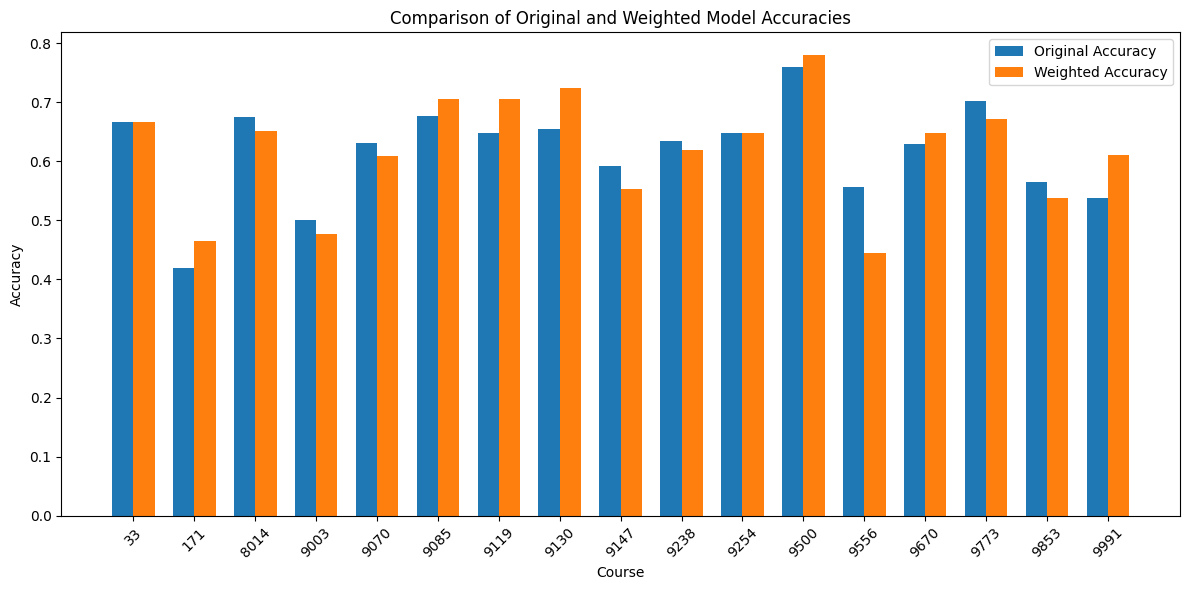

In [307]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = pd.RangeIndex(len(courses))

plt.bar(index, accuracy_comparison_df['Original Accuracy'], bar_width, label='Original Accuracy')
plt.bar(index + bar_width, accuracy_comparison_df['Weighted Accuracy'], bar_width, label='Weighted Accuracy')

plt.xlabel('Course')
plt.ylabel('Accuracy')
plt.title('Comparison of Original and Weighted Model Accuracies')
plt.xticks(index + bar_width / 2, courses, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [308]:
accuracy_comparison_df

,Course,Original Accuracy,Weighted Accuracy
0,33,0.666667,0.666667
1,171,0.418605,0.465116
2,8014,0.674419,0.651163
3,9003,0.500000,0.476190
4,9070,0.630435,0.608696
5,9085,0.676471,0.705882
6,9119,0.647059,0.705882
7,9130,0.655172,0.724138
8,9147,0.592105,0.552632
9,9238,0.633803,0.619718


In [309]:
metrics = ['precision', 'recall', 'f1-score']
original_metrics = {metric: [] for metric in metrics}
weighted_metrics = {metric: [] for metric in metrics}
courses = []

for course in original_course_reports:
    courses.append(course)
    for metric in metrics:
        original_metrics[metric].append(original_course_reports[course]['weighted avg'][metric])
        weighted_metrics[metric].append(weighted_course_reports[course]['weighted avg'][metric])

original_metrics_df = pd.DataFrame(original_metrics, index=courses)
weighted_metrics_df = pd.DataFrame(weighted_metrics, index=courses)

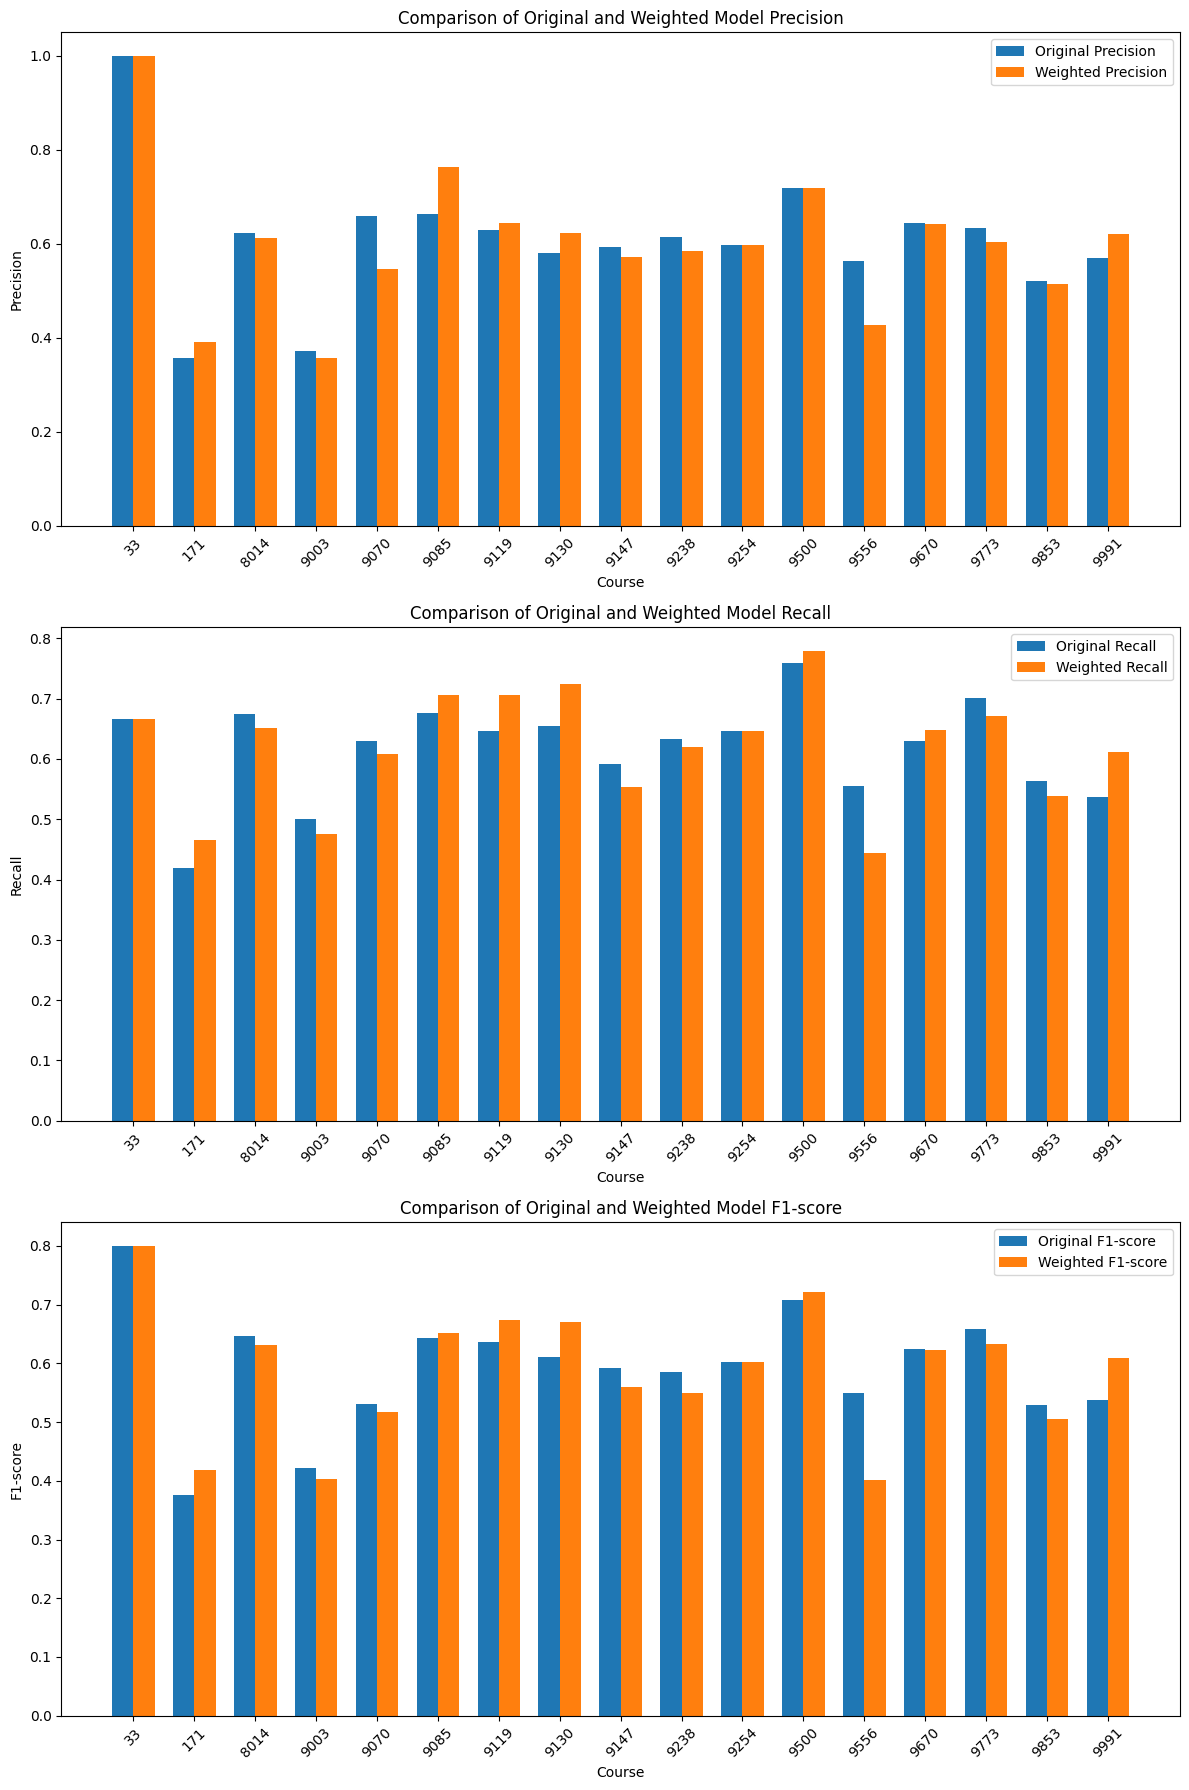

In [310]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for idx, metric in enumerate(metrics):
    bar_width = 0.35
    index = pd.RangeIndex(len(courses))

    axes[idx].bar(index, original_metrics_df[metric], bar_width, label='Original ' + metric.capitalize())
    axes[idx].bar(index + bar_width, weighted_metrics_df[metric], bar_width, label='Weighted ' + metric.capitalize())

    axes[idx].set_xlabel('Course')
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].set_title(f'Comparison of Original and Weighted Model {metric.capitalize()}')
    axes[idx].set_xticks(index + bar_width / 2)
    axes[idx].set_xticklabels(courses, rotation=45)
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [311]:
print("Original Metrics:")
original_metrics_df

Original Metrics:


,precision,recall,f1-score
33,1.000000,0.666667,0.800000
171,0.356417,0.418605,0.375264
8014,0.622093,0.674419,0.646969
9003,0.372522,0.500000,0.421102
9070,0.659938,0.630435,0.531492
9085,0.664403,0.676471,0.643102
9119,0.629864,0.647059,0.635519
9130,0.580902,0.655172,0.611285
9147,0.594212,0.592105,0.592548
9238,0.614085,0.633803,0.585049


In [312]:
print("\nWeighted Metrics:")
weighted_metrics_df


Weighted Metrics:


,precision,recall,f1-score
33,1.000000,0.666667,0.800000
171,0.391771,0.465116,0.417650
8014,0.612642,0.651163,0.630863
9003,0.356785,0.476190,0.403199
9070,0.546129,0.608696,0.517690
9085,0.763092,0.705882,0.652188
9119,0.643804,0.705882,0.673415
9130,0.623775,0.724138,0.670054
9147,0.572455,0.552632,0.559952
9238,0.583613,0.619718,0.549768


In [313]:
# applying a hypertunning tool to try and make the randomclassifier perform better

In [314]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                                   param_distributions=param_grid, n_iter=100, cv=3, verbose=2, 
                                   random_state=42, n_jobs=-1)

tuned_course_models = {}
tuned_course_reports = {}
tuned_accuracies = {}

for course, data in course_groups:
    X = data.drop(['Target', 'Course'], axis=1)
    y = data['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    tuned_course_models[course] = best_model
    tuned_course_reports[course] = classification_report(y_test, y_pred, output_dict=True)
    tuned_accuracies[course] = accuracy_score(y_test, y_pred)
    
    print(f"Course: {course}")
    print("Tuned model report:")
    print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\A

Course: 33
Tuned model report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 171
Tuned model report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.42      0.59      0.49        17
           2       0.00      0.00      0.00         8

    accuracy                           0.44        43
   macro avg       0.31      0.36      0.33        43
weighted avg       0.37      0.44      0.40        43

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 8014
Tuned model report:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.75      0.72      0.74        29
           2       0.00      0.00      0.00         3

    accuracy                           0.65        43
   macro avg       0.42      0.45      0.43        43
weighted avg       0.63      0.65      0.64        43

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9003
Tuned model report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.41      0.75      0.53        12
           2       0.33      0.08      0.12        13

    accuracy                           0.48        42
   macro avg       0.44      0.47      0.41        42
weighted avg       0.46      0.48      0.43        42

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9070
Tuned model report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.68      0.85      0.75        27
           2       0.29      0.22      0.25         9

    accuracy                           0.61        46
   macro avg       0.52      0.46      0.47        46
weighted avg       0.58      0.61      0.58        46

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9085
Tuned model report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.71      0.86      0.78        35
           2       0.43      0.20      0.27        15

    accuracy                           0.68        68
   macro avg       0.61      0.59      0.58        68
weighted avg       0.64      0.68      0.65        68

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9119
Tuned model report:
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.22      0.67      0.33         3
           2       0.50      0.60      0.55        10

    accuracy                           0.59        34
   macro avg       0.55      0.61      0.53        34
weighted avg       0.74      0.59      0.63        34

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
92 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9130
Tuned model report:
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.57      0.89      0.70         9
           2       0.00      0.00      0.00         4

    accuracy                           0.59        29
   macro avg       0.46      0.48      0.45        29
weighted avg       0.63      0.59      0.58        29

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9147
Tuned model report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        25
           1       0.69      0.55      0.61        33
           2       0.36      0.56      0.43        18

    accuracy                           0.58        76
   macro avg       0.59      0.58      0.58        76
weighted avg       0.62      0.58      0.59        76

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9238
Tuned model report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        18
           1       0.63      0.91      0.75        44
           2       0.50      0.11      0.18         9

    accuracy                           0.62        71
   macro avg       0.54      0.40      0.39        71
weighted avg       0.58      0.62      0.55        71

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9254
Tuned model report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.62      0.83      0.71        24
           2       0.00      0.00      0.00         6

    accuracy                           0.63        51
   macro avg       0.46      0.47      0.45        51
weighted avg       0.60      0.63      0.60        51

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9500
Tuned model report:
              precision    recall  f1-score   support

           0       0.67      0.35      0.46        17
           1       0.80      0.97      0.88       116
           2       0.33      0.05      0.08        21

    accuracy                           0.78       154
   macro avg       0.60      0.46      0.47       154
weighted avg       0.72      0.78      0.72       154

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9556
Tuned model report:
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.55      0.75      0.63         8
           2       0.33      0.50      0.40         2

    accuracy                           0.56        18
   macro avg       0.54      0.54      0.51        18
weighted avg       0.61      0.56      0.55        18

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9670
Tuned model report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.63      0.86      0.73        28
           2       0.33      0.14      0.20         7

    accuracy                           0.65        54
   macro avg       0.58      0.51      0.52        54
weighted avg       0.64      0.65      0.62        54

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9773
Tuned model report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.72      0.88      0.79        41
           2       0.00      0.00      0.00         7

    accuracy                           0.69        67
   macro avg       0.45      0.47      0.45        67
weighted avg       0.62      0.69      0.65        67

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9853
Tuned model report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.53      0.82      0.64        11
           2       0.57      0.33      0.42        12

    accuracy                           0.59        39
   macro avg       0.59      0.59      0.57        39
weighted avg       0.60      0.59      0.58        39

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Course: 9991
Tuned model report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.37      0.50      0.42        14
           2       0.40      0.40      0.40        10

    accuracy                           0.57        54
   macro avg       0.52      0.52      0.52        54
weighted avg       0.61      0.57      0.59        54



In [315]:
courses = []
original_accuracy_values = []
weighted_accuracy_values = []
tuned_accuracy_values = []

for course in original_accuracies:
    courses.append(course)
    original_accuracy_values.append(original_accuracies[course])
    weighted_accuracy_values.append(weighted_accuracies[course])
    tuned_accuracy_values.append(tuned_accuracies[course])

accuracy_comparison_df = pd.DataFrame({
    'Course': courses,
    'Original Accuracy': original_accuracy_values,
    'Weighted Accuracy': weighted_accuracy_values,
    'Tuned Accuracy': tuned_accuracy_values
})

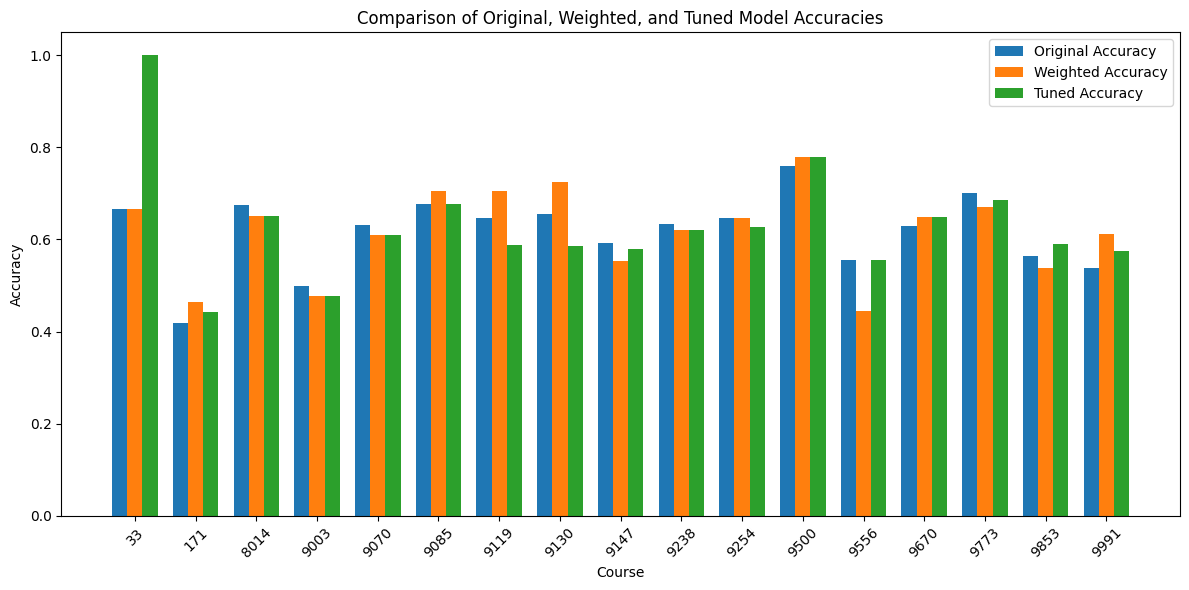

In [316]:
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = pd.RangeIndex(len(courses))

plt.bar(index, accuracy_comparison_df['Original Accuracy'], bar_width, label='Original Accuracy')
plt.bar(index + bar_width, accuracy_comparison_df['Weighted Accuracy'], bar_width, label='Weighted Accuracy')
plt.bar(index + 2 * bar_width, accuracy_comparison_df['Tuned Accuracy'], bar_width, label='Tuned Accuracy')

plt.xlabel('Course')
plt.ylabel('Accuracy')
plt.title('Comparison of Original, Weighted, and Tuned Model Accuracies')
plt.xticks(index + bar_width, courses, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [317]:
accuracy_comparison_df

,Course,Original Accuracy,Weighted Accuracy,Tuned Accuracy
0,33,0.666667,0.666667,1.000000
1,171,0.418605,0.465116,0.441860
2,8014,0.674419,0.651163,0.651163
3,9003,0.500000,0.476190,0.476190
4,9070,0.630435,0.608696,0.608696
5,9085,0.676471,0.705882,0.676471
6,9119,0.647059,0.705882,0.588235
7,9130,0.655172,0.724138,0.586207
8,9147,0.592105,0.552632,0.578947
9,9238,0.633803,0.619718,0.619718


### Section 4.4

**Decision Tree Model**

In [318]:
# Before SMOTE
df_learner_profile

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,19,12,5,9,...,0,0,1,1,0,20,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,1,3,3,3,...,0,0,0,1,0,19,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,37,37,9,9,...,0,0,0,1,0,19,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,38,37,5,3,...,0,0,1,0,0,20,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,37,38,9,9,...,0,0,1,0,0,45,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,1,5,4,...,0,0,1,1,0,19,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,105,1,1,9,9,...,0,1,0,0,0,18,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,37,37,9,9,...,0,0,1,0,1,30,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,37,37,7,4,...,0,0,1,0,1,20,9.4,-0.8,-3.12,1


In [319]:
X = df_learner_profile.drop('Target', axis=1)
y = df_learner_profile['Target']

print("Original class distribution:")
print(Counter(y))

Original class distribution:
Counter({1: 2209, 0: 1421, 2: 794})


In [320]:
smote = SMOTE(sampling_strategy={0: 2209, 2:2209})

X_res, y_res = smote.fit_resample(X, y)

print("Resampled class distribution:")
print(Counter(y_res))

Resampled class distribution:
Counter({0: 2209, 1: 2209, 2: 2209})


In [321]:
df_learner_profile_2 = pd.concat([X_res, y_res], axis=1)
print(df_learner_profile.shape)
print(df_learner_profile_2.shape)

(4424, 21)
(6627, 21)


In [322]:
df_learner_profile_2["Target"].value_counts()

Target
0    2209
1    2209
2    2209
Name: count, dtype: int64

In [323]:
# After SMOTE
df_learner_profile_2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,19,12,5,9,...,0,0,1,1,0,20,10.800000,1.400000,1.740000,0
1,1,15,1,9254,1,1,1,3,3,3,...,0,0,0,1,0,19,13.900000,-0.300000,0.790000,1
2,1,1,5,9070,1,1,37,37,9,9,...,0,0,0,1,0,19,10.800000,1.400000,1.740000,0
3,1,17,2,9773,1,1,38,37,5,3,...,0,0,1,0,0,20,9.400000,-0.800000,-3.120000,1
4,2,39,1,8014,0,1,37,38,9,9,...,0,0,1,0,0,45,13.900000,-0.300000,0.790000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,1,1,9085,1,1,3,1,3,8,...,0,0,1,0,0,20,12.400000,0.500000,1.790000,2
6623,1,43,1,9773,1,1,7,37,3,6,...,0,0,1,0,0,29,14.513652,-0.139917,0.333763,2
6624,1,16,2,9119,1,4,1,17,141,188,...,0,0,1,0,0,18,8.900000,1.400000,3.510000,2
6625,1,8,1,9773,1,1,37,19,6,8,...,0,0,1,0,0,18,15.500000,2.800000,-4.060000,2


In [324]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', "Mother's qualification",
       "Father's qualification", "Mother's occupation", "Father's occupation",
       'Nacionality', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df_learner_profile_2[cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cols))

c:\Users\hnkha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [325]:
data = df_learner_profile_2.drop(cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)

X = df_learner_profile_2.drop('Target', axis=1)
y = df_learner_profile_2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [327]:
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       444
           1       0.62      0.61      0.61       443
           2       0.61      0.61      0.61       439

    accuracy                           0.61      1326
   macro avg       0.61      0.61      0.61      1326
weighted avg       0.61      0.61      0.61      1326



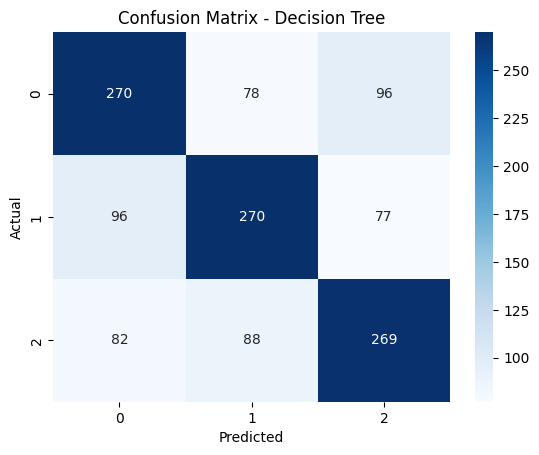

In [328]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [329]:
lb = LabelBinarizer()
lb.fit(y_train)
y_test_binarized = lb.transform(y_test)
y_pred_prob = decision_tree.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.707582699531741


In [330]:
# Feature importance
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances in the Decision Tree model:")
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

Feature importances in the Decision Tree model:
Course: 0.11221569550542318
Tuition fees up to date: 0.10186359241763171
Age at enrollment: 0.09350685387247867
Mother's occupation: 0.09054535955253133
Father's occupation: 0.09031078482128846
GDP: 0.06841866436269918
Inflation rate: 0.062065483465591015
Scholarship holder: 0.05842164214856037
Father's qualification: 0.05553776610851228
Mother's qualification: 0.0538201125126175
Application mode: 0.05314228838046523
Unemployment rate: 0.05266590707650557
Application order: 0.030678191480874906
Gender: 0.022771963398608486
Displaced: 0.017129648500248795
Debtor: 0.011792625129221475
Marital status: 0.010412393176677576
Nacionality: 0.007346251779668869
Daytime/evening attendance	: 0.006088734385747994
Educational special needs: 0.0012660419246474375


C:\Users\hnkha\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


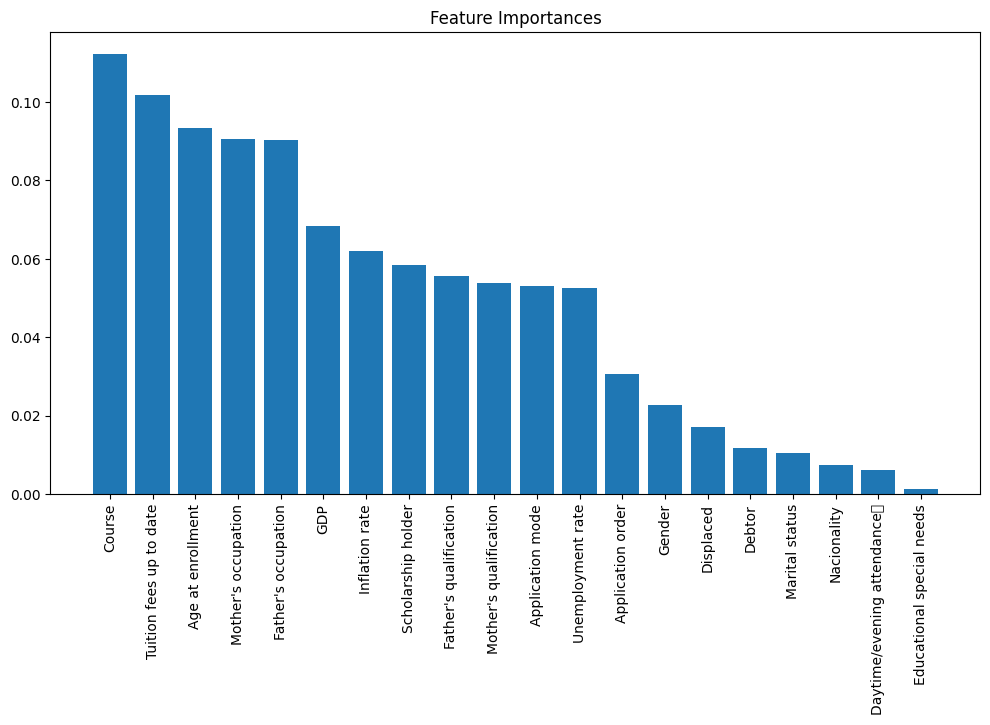

In [331]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()

In [332]:
scores = cross_val_score(decision_tree, X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())

Cross-Validation Scores:  [0.5173454  0.57466063 0.61207547 0.68528302 0.69509434]
Mean Cross-Validation Score:  0.6168917726742367


### Section 5

### Section 5.1

Using Previous grade, semester 1 and semester 2 grades to predict final outcome

In [458]:
cols = ['Previous qualification (grade)',
           'Curricular units 2nd sem (grade)',
           'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (approved)','Target']

mapping ={
    "Dropout": 0,
    "Graduate": 1,
    "Enrolled": 2
}

df_grade_2 = df[cols]
df_grade_2["Target"] = df_grade_2["Target"].map(mapping)
df_grade_2.Target.unique()

C:\Users\hnkha\AppData\Local\Temp\ipykernel_24980\3272125261.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grade_2["Target"] = df_grade_2["Target"].map(mapping)


array([0, 1, 2], dtype=int64)

In [459]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_grade_2.loc[:, df_grade_2.columns != 'Target'],
    df_grade_2['Target'],
    test_size=0.2,
    random_state=42
    )
x_train_before_normalisation = torch.from_numpy(X_train.values).float()
x_test_before_normalisation = torch.from_numpy(X_test.values).float()

y_train = torch.from_numpy(y_train.values).int()
y_train = y_train.reshape(-1, 1)

y_test = torch.from_numpy(y_test.values).int()
y_test = y_test.reshape(-1, 1)

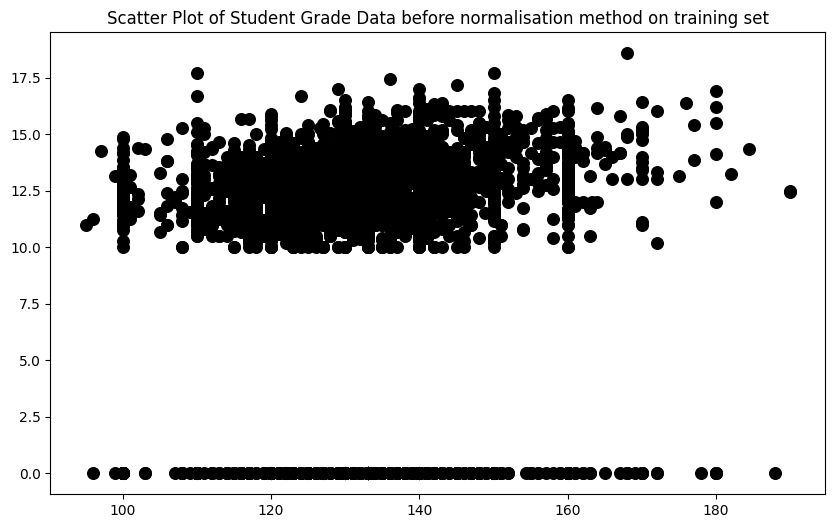

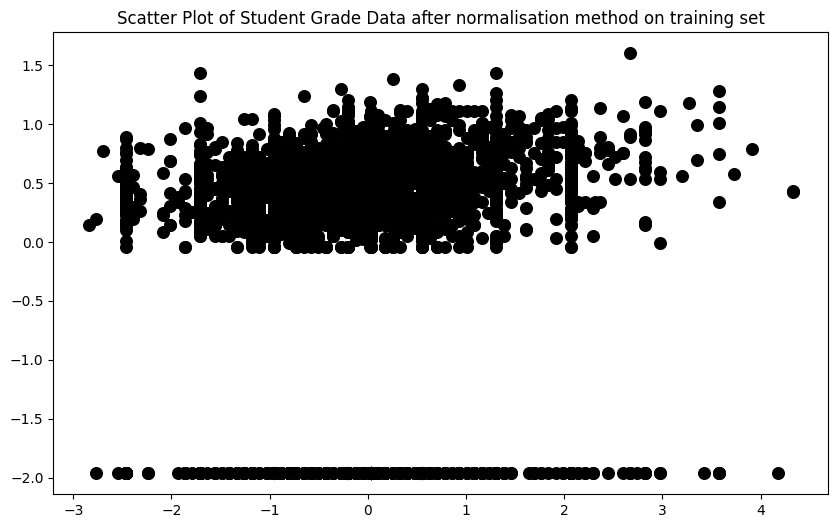

In [460]:
# this has been taken from the previous assignment
def norm_set(x: torch.Tensor, mu: torch.Tensor, sigma: torch.Tensor) -> torch.tensor:
  # formula for the normalised value
  z = (x-mu)/sigma
  return z

# calculating the mean and standard deviation
mean = x_train_before_normalisation.mean(dim=0)
standard_deviation = x_train_before_normalisation.std(dim=0)

# calculate the normalised value x_train
x_train = norm_set(x_train_before_normalisation, mean, standard_deviation)

# calculate the normalised value for x_test
x_test = norm_set(x_test_before_normalisation, mean, standard_deviation)

plt.figure(figsize=(10, 6))
plt.scatter(x_train_before_normalisation[:, 0], x_train_before_normalisation[:, 1], s=70, color='black')
plt.title('Scatter Plot of Student Grade Data before normalisation method on training set')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], s=70, color='black')
plt.title('Scatter Plot of Student Grade Data after normalisation method on training set')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


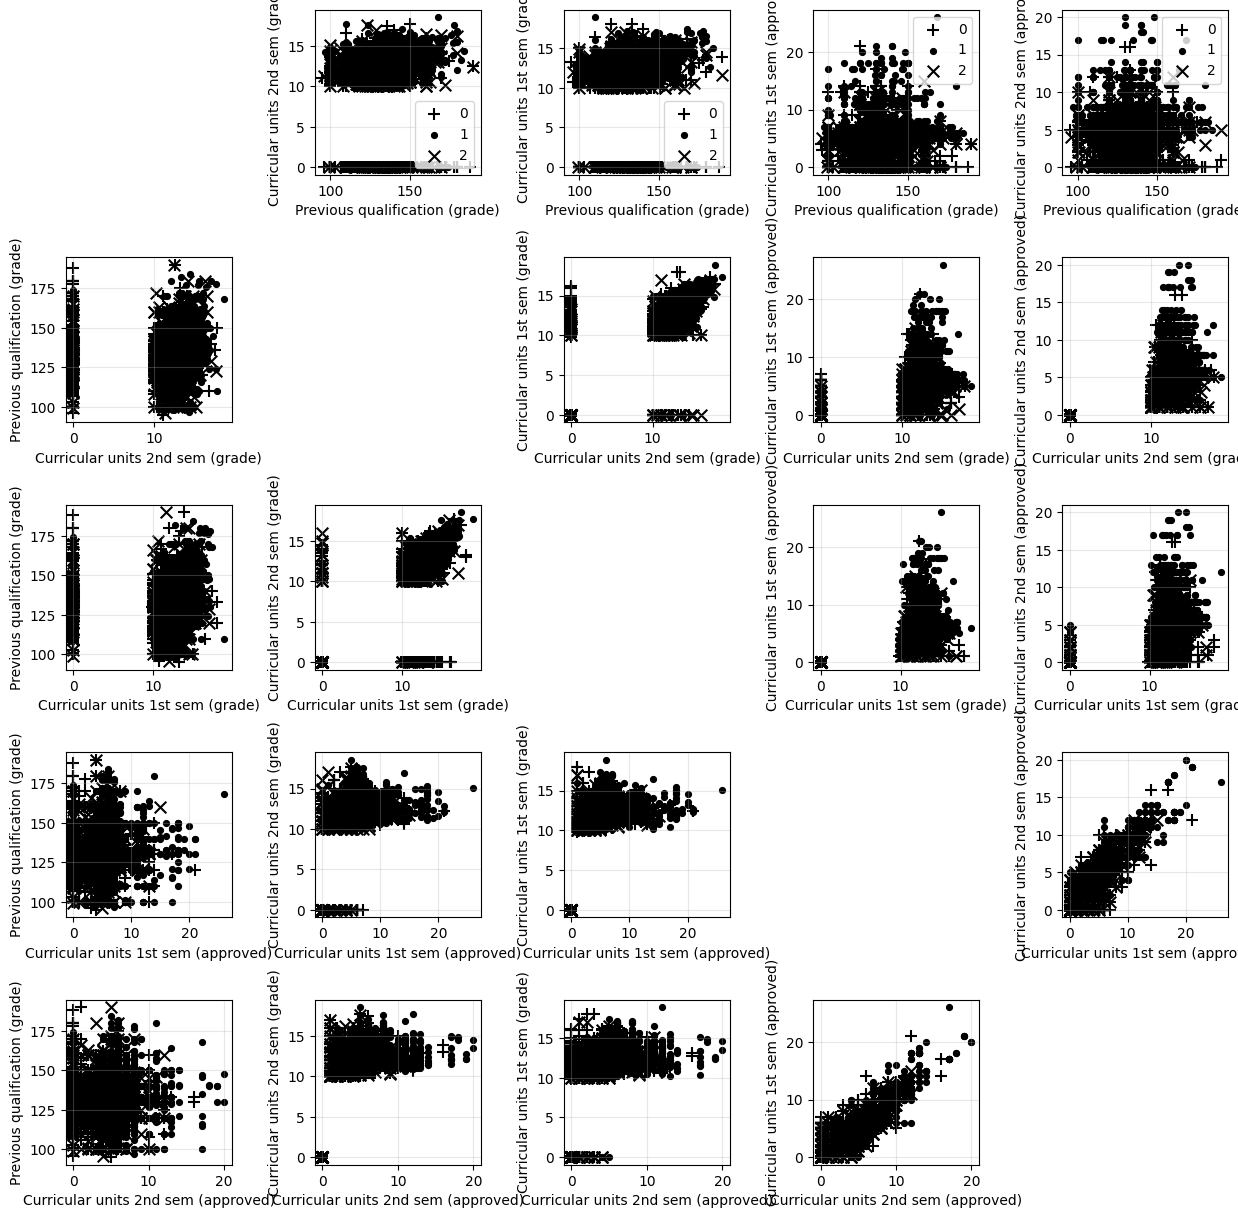

In [461]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_grade_2 is already defined
X = df_grade_2.loc[:, df_grade_2.columns != 'Target']
Y = df_grade_2['Target']

feature_names = ['Previous qualification (grade)',
           'Curricular units 2nd sem (grade)',
           'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (approved)',
           'Curricular units 2nd sem (approved)']
marker_list = ['+', '.', 'x']

# Number of features
n_features = X.shape[1]

# Create subplots
fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop through each pair of features
for i in range(n_features):
    for j in range(n_features):
        ax = axes[i, j]
        
        if i != j:
            # Scatter plot for feature pairs (i, j)
            for l in [0, 1, 2]:
                ax.scatter(
                    X.loc[Y == l, X.columns[i]],  # Use .loc instead of .iloc
                    X.loc[Y == l, X.columns[j]],  # Use .loc instead of .iloc
                    marker=marker_list[l],
                    s=70,
                    color='black',
                    label='{:d}'.format(l)
                )
            ax.set_xlabel(feature_names[i])
            ax.set_ylabel(feature_names[j])
        else:
            # Empty plots on the diagonal
            ax.set_visible(False)

        # Add grid and legend
        ax.grid(alpha=0.3)
        if i == 0:
            ax.legend(fontsize=10)

# Show the plot
plt.show()

In [462]:
train_set_1 = x_train[:, :2]
test_set_1 = x_test[:, :2]

# add a feature for bias
train_set_1 = torch.cat([train_set_1, torch.ones(train_set_1.shape[0], 1)], dim=1)
test_set_1 = torch.cat([test_set_1, torch.ones(test_set_1.shape[0], 1)], dim=1)

dropout_train = (y_train == 0).int()
dropout_test = (y_test == 0).int()

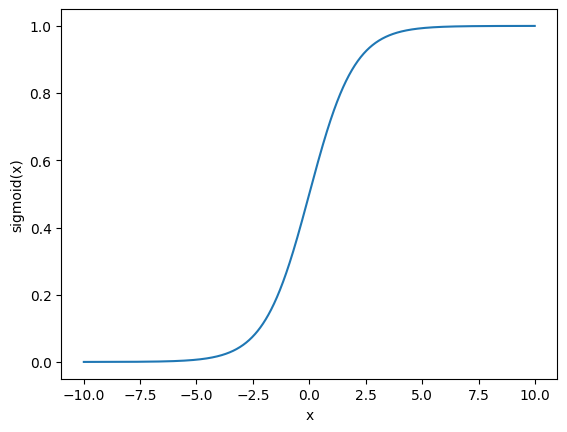

In [463]:
def sigmoid(z: torch.Tensor) -> torch.Tensor:
  z = 1 / (1 + torch.exp(-z))
  return z

x = torch.arange(1,2000, 1)/100.0 - 10
y = sigmoid(x)
fig, ax1 = plt.subplots()
ax1.plot(x, y)
# set label of horizontal axis
ax1.set_xlabel('x')
# set label of vertical axis
ax1.set_ylabel('sigmoid(x)')
plt.show()

In [464]:
class LogisticRegression(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.weight = nn.Parameter(torch.zeros(1, num_features), requires_grad=False)

  def forward(self, x):
    z = torch.matmul(x, self.weight.T)
    y = sigmoid(z)
    return y

In [465]:
def bce(y_true: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
  N = y_true.shape[0]
  cost_function = (1/N) * torch.sum(-y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred))
  return cost_function

""" In the original function defintion there was a "y_pred: torch.Tensor" but when i ran it with the below train function
it was giving me an error on the line "gradient_descent_step(model, x, y, alpha)" where i spotted that there was no y_pred
included. For this reason, i decided to take it and embedd it into the function."""
def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, lr: float) -> None:
  weight = model.weight
  N = X.shape[0]
  y_pred = model(X)
  performance = y_pred - y
  gradient = (1/N) * torch.matmul(X.t(), performance)
  weight = weight - (lr * gradient.T)
  model.weight = nn.Parameter(weight, requires_grad=False)
  return model.weight

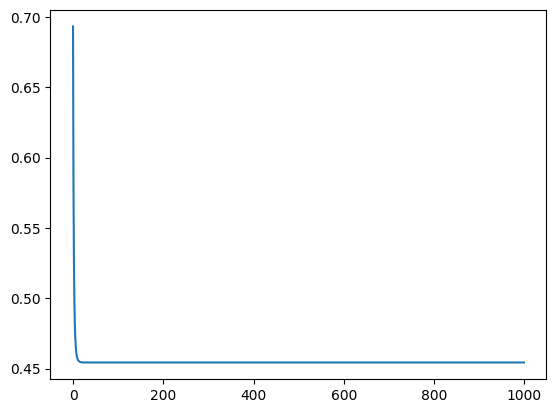

Parameter containing:
tensor([[-0.1854, -1.3425, -0.9199]])
Minimum cost: 0.4543296694755554
[tensor(0.6931), tensor(0.5826), tensor(0.5275), tensor(0.4982), tensor(0.4817), tensor(0.4720), tensor(0.4660), tensor(0.4621), tensor(0.4596), tensor(0.4580), tensor(0.4569), tensor(0.4561), tensor(0.4556), tensor(0.4552), tensor(0.4550), tensor(0.4548), tensor(0.4547), tensor(0.4546), tensor(0.4545), tensor(0.4545), tensor(0.4544), tensor(0.4544), tensor(0.4544), tensor(0.4544), tensor(0.4544), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4543), tensor(0.4

In [466]:
def train(model, x, y, alpha):
  cost_lst = list()
  for it in range(1000):
    prediction = model(x)
    cost = bce(y, prediction)
    cost_lst.append(cost)
    gradient_descent_step(model, x, y, alpha)
  display.clear_output(wait=True)
  plt.plot(list(range(it+1)), cost_lst)
  plt.show()
  print(model.weight)
  print('Minimum cost: {}'.format(min(cost_lst)))
  print(cost_lst)

model = LogisticRegression(train_set_1.shape[1])
alpha = 1.2 # select an appropriate lr
train(model, train_set_1, dropout_train, alpha)

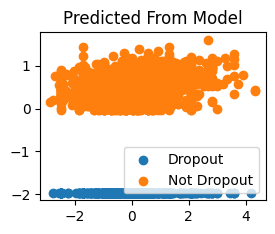

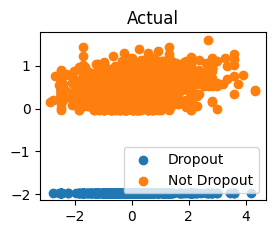

In [467]:
predictions = model(train_set_1)

# Convert predictions to binary values (0 or 1)
dropout_predictions = torch.round(predictions).int()

# Convert tensors to numpy arrays for easier plotting
train_set_1_np = train_set_1.numpy()
dropout_train_np = dropout_train.numpy()

# Reshape train_set_1_np if needed
if len(train_set_1_np.shape) == 1:
    train_set_1_np = train_set_1_np.reshape(-1, 1)

# Plot predicted vs. actual
plt.subplot(2, 2, 1)
plt.scatter(train_set_1_np[dropout_predictions.flatten() == 1, 0], train_set_1_np[dropout_predictions.flatten() == 1, 1], label="Dropout")
plt.scatter(train_set_1_np[dropout_predictions.flatten() == 0, 0], train_set_1_np[dropout_predictions.flatten() == 0, 1], label="Not Dropout")
plt.title("Predicted From Model")
plt.legend()
plt.show()

plt.subplot(2, 2, 2)
plt.scatter(train_set_1_np[dropout_predictions.flatten() == 1, 0], train_set_1_np[dropout_predictions.flatten() == 1, 1], label="Dropout")
plt.scatter(train_set_1_np[dropout_predictions.flatten() == 0, 0], train_set_1_np[dropout_predictions.flatten() == 0, 1], label="Not Dropout")
plt.title("Actual")
plt.legend()
plt.show()


In [472]:
X = df_grade_2[['Previous qualification (grade)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (approved)',
                'Curricular units 2nd sem (approved)']]
y = df_grade_2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class='ovr', max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6531073446327683
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.54      0.65       316
           1       0.73      0.81      0.77       418
           2       0.32      0.46      0.38       151

    accuracy                           0.65       885
   macro avg       0.63      0.60      0.60       885
weighted avg       0.70      0.65      0.66       885



In [469]:
coefficients = model.coef_
features = X.columns

for i, coef in enumerate(coefficients):
    print(f"Class {i} coefficients:")
    for feature, weight in zip(features, coef):
        print(f"{feature}: {weight:.4f}")
    print()

Class 0 coefficients:
Previous qualification (grade): -0.1801
Curricular units 2nd sem (grade): -0.5565
Curricular units 1st sem (grade): 0.0383
Curricular units 1st sem (approved): 0.4143
Curricular units 2nd sem (approved): -1.5858

Class 1 coefficients:
Previous qualification (grade): 0.2444
Curricular units 2nd sem (grade): 0.2907
Curricular units 1st sem (grade): -0.1715
Curricular units 1st sem (approved): -0.1442
Curricular units 2nd sem (approved): 1.8390

Class 2 coefficients:
Previous qualification (grade): -0.1536
Curricular units 2nd sem (grade): 0.8896
Curricular units 1st sem (grade): 0.0254
Curricular units 1st sem (approved): -0.2017
Curricular units 2nd sem (approved): -0.7230



Here’s how you might use these insights:

High Influence Features:

For Class 0, low grades in the 2nd semester and fewer approved 2nd semester units are strong indicators.
For Class 1, high grades in the 2nd semester and more approved 2nd semester units are strong indicators.
For Class 2, high grades in the 2nd semester are significant indicators.


Feature Impacts:

Grades generally have mixed effects, with the influence varying by class.
Approval Status of curricular units seems to play a crucial role, particularly for Class 1.

In [471]:
cv_scores = cross_val_score(best_model, X, y, cv=10)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', np.mean(cv_scores))

Cross-Validation Scores: [0.68171558 0.70654628 0.6772009  0.65011287 0.70588235 0.68325792
 0.69683258 0.68552036 0.68099548 0.66968326]
Mean CV Score: 0.6837747566468853
